# **Analítica auditoría CMM Paraguay**



> ### **El problema**
- **Baja tasa de retorno de inversión**: Se descartaron irregularidades contables, financieras significativas, y caídas drásticas en la demanda como causas. Se identificó un **fallo estratégico** por parte de los directivos de CMM.
>
> ### **El objetivo**
- **Identificar el problema:** Demostrar analítica y visualmente cuál fue el problema en la estrategia de CMM.
- **Investigar y explicar el motivo:** Analizando el contexto, este análisis busca identificar con precisión los factores que contribuyeron a la baja tasa de retorno de inversión, evaluando tanto la estrategia empresarial como el entorno económico en Paraguay.

## Introducción

En este proyecto, se analizarán las ventas y la distribución de productos de la empresa CMM en Paraguay para identificar problemas y oportunidades en la estrategia comercial.



Un análisis preliminar no reveló irregularidades contables, financieras significativas, ni caídas drásticas en la demanda que pudieran explicar la **baja tasa de retorno de inversión**.

Por consiguiente, se concluyó que hubo un **fallo estratégico** por parte de los directivos de CMM.

### Datos del Equipo Paraguayo de Auditoría:
- **sales_in_Paraguay.xlsx**: Resumen de ventas en Paraguay (ventas por distribuidor y producto).
- **distributors_profiles.csv**: Perfil de los distribuidores en el país, incluyendo el nombre de la empresa, actividades y años activos en el mercado de la construcción.
  - `id`: Identificador del distribuidor
  - `distributor`: Nombre de la empresa
  - `distributor activities`: Actividades de la empresa
  - `years in the construction market`: Años activo en el mercado de la construcción

### Datos del Equipo de Comercialización de CMM:
- **exports_to_Paraguay.csv**: Resúmenes y reportes de exportación de materiales a Paraguay.

Además, nuestro equipo compiló información adicional de diversas fuentes para ampliar el contexto del análisis:

- Datos de la CNAEP (Clasificación Nacional de Actividades Económicas del Paraguay).
- Reportes del UNFPA (Fondo de Población de las Naciones Unidas).
- DGEEC (Dirección General de Estadística, Encuestas y Censos de Paraguay).
- [Artículo](https://revistacientifica.sudamericana.edu.py/index.php/scientiamericana/article/view/175/194) sobre el mapeo de industrias en Paraguay registrado en el Ministerio de Industria y Comercio.

- **locations_profiles.csv**: Principales actividades económicas por ciudad.
  - `PYid`: Identificador de la ciudad
  - `id`: Identificador de la ciudad (presente solo si existe un distribuidor de la compañía en esa ciudad)
  - `location`: Nombre de la ciudad
  - `department`: Departamento
  - `activities`: Principales actividades económicas de la ciudad

Todos los datos han sido sometidos a un riguroso proceso de limpieza y validación para asegurar su precisión.

Utilizando técnicas avanzadas de limpieza de datos, modelado y visualización, nuestro objetivo es **demostrar analítica y visualmente** cuál fue el problema en la estrategia de CMM y, adicionalmente, **investigar y explicar el motivo** analizando el contexto. Este análisis busca identificar con precisión los factores que contribuyeron a la baja tasa de retorno de inversión, evaluando tanto la estrategia empresarial como el entorno económico en Paraguay.


## 1) IMPORTACION DE LIBRERIAS Y OBTENCION DE DATOS

#### Importación de Librerías


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes
import warnings

#### Configuración para Google Colab

In [ ]:
ID_planilla = '1g0zNkoZQ3JVLtq8KntUcHYkbKRFnIcQv'

URL = f'https://docs.google.com/spreadsheets/d/{ID_planilla}/gviz/tq?tqx=out:csv&sheet='

#### Lectura de datos

In [ ]:
df_distributors = pd.read_csv(URL+'distributors', dtype={'id':np.object_})
df_exports = pd.read_csv(URL+'exports', dtype={'distributor':np.object_})
df_locations = pd.read_csv(URL+'locations', dtype={'id':np.object_})
df_sales = pd.read_csv(URL+'sales', dtype={'distributor':np.object_})

## 2) INSPECCION PRELIMINAR Y LIMPIEZA

### Exploración de Datos de Distribuidores

In [ ]:
display(df_distributors.head(3), df_distributors.tail(3))

,id,distributor,distributor activities,years in the construction market
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1.384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1.183,Brekke-Stiedemann,construction materials import/distribution,13


,id,distributor,distributor activities,years in the construction market
43,1.560,Volkman-Goyette,"construction materials import/distribution, in...",18
44,1.169,"Williamson, Bailey and McLaughlin",construction materials import/distribution,12
45,1.679,Windler-Baumbach,"construction materials import/distribution, st...",15


In [ ]:
display(df_distributors.describe(include='all'))
display(df_distributors.dtypes)

,id,distributor,distributor activities,years in the construction market
count,44,44,44,46.000000
unique,44,44,19,NaN
top,565,Abernathy-Hayes,construction materials import/distribution,NaN
freq,1,1,15,NaN
mean,NaN,NaN,NaN,15.804348
std,NaN,NaN,NaN,5.775887
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,13.000000
50%,NaN,NaN,NaN,16.500000
75%,NaN,NaN,NaN,19.000000


id                                  object
distributor                         object
distributor activities              object
years in the construction market     int64
dtype: object

El ID de los distribuidores contiene valores con puntos, interpretados como números de punto flotante y NaN.

In [ ]:
warnings.filterwarnings('ignore')
df_distributors = df_distributors.dropna()
df_distributors['id'] = df_distributors['id'].str.replace('.', '')
df_distributors['id'] = df_distributors['id'].astype('int64')
display(df_distributors.head(3))
df_distributors.dtypes

,id,distributor,distributor activities,years in the construction market
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1183,Brekke-Stiedemann,construction materials import/distribution,13


id                                   int64
distributor                         object
distributor activities              object
years in the construction market     int64
dtype: object

In [ ]:
display(df_distributors['distributor activities'].unique())
df_distributors.duplicated().sum()

array(['construction materials import/distribution, iron, copper & zinc production',
       'construction materials import/distribution, silicone & polystyrene production',
       'construction materials import/distribution',
       'construction materials import/distribution, iron & steel production',
       'construction materials import/distribution, copper production',
       'construction materials import/distribution, neoprene production',
       'construction materials import/distribution, zinc production',
       'construction materials import/distribution, \nelectrowelded meshes production',
       'construction materials import/distribution, electrical materials production',
       'construction materials import/distribution, insulator production',
       'construction materials import/distribution, cement production',
       'construction materials import/distribution, asphalt production',
       'construction materials import/distribution, zinc & copper production',
       

0

In [ ]:
df_distributors['distributor activities'].info()

<class 'pandas.core.series.Series'>
Index: 44 entries, 0 to 45
Series name: distributor activities
Non-Null Count  Dtype 
--------------  ----- 
44 non-null     object
dtypes: object(1)
memory usage: 704.0+ bytes


### Exploración de Datos de Exportaciones

In [ ]:
display(df_exports.head(), df_exports.tail())

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
41,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00",NaN,NaN,NaN
42,619,"$41.761.417,00","$33.709.306,00","$27.497.587,00","$28.311.310,00","$21.683.294,00","$26.276.785,00","$32.530.973,00","$21.500.385,00","$23.197.054,00","$43.835.851,00","$29.355.739,00","$43.689.411,00",NaN,NaN,NaN
43,715,"$20.880.116,00","$37.111.825,00","$34.422.161,00","$40.759.561,00","$26.050.968,00","$21.080.855,00","$21.443.932,00","$22.394.142,00","$23.084.319,00","$26.861.046,00","$23.181.358,00","$22.709.805,00",NaN,NaN,NaN
44,1.302,"$34.050.845,00","$30.151.961,00","$26.956.027,00","$45.003.866,00","$23.879.569,00","$27.287.921,00","$44.733.537,00","$21.113.491,00","$22.884.480,00","$26.530.501,00","$40.810.028,00","$27.286.530,00",NaN,NaN,NaN
45,1.093,"$35.580.430,00","$39.978.595,00","$32.046.855,00","$30.147.636,00","$36.212.747,00","$33.365.715,00","$35.482.192,00","$26.604.405,00","$21.395.275,00","$31.214.082,00","$32.655.598,00","$20.684.792,00",NaN,NaN,NaN


In [ ]:
display(df_exports.describe(include='all'), df_exports.dtypes)

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
count,46,46,46,46,46,46,46,46,46,46,46,46,46,0.0,1,1
unique,44,44,44,44,44,44,44,44,44,44,44,44,44,NaN,1,1
top,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00",NaN,Filas,Valores
freq,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


distributor     object
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
Unnamed: 13    float64
Unnamed: 14     object
Columnas        object
dtype: object

El dataset contiene tres columnas adicionales al final, las cuales se eliminan.

In [ ]:
df_exports = df_exports.drop(df_exports.columns[-3:], axis=1)
df_exports.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"


Se identificaron 2 registros duplicados y fueron eliminados.

In [ ]:
display(df_exports[df_exports.duplicated(keep=False)], df_exports.duplicated().sum())
df_exports = df_exports.drop_duplicates()
df_exports.duplicated().sum()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
11,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00"
13,1.169,"$38.180.046,00","$28.960.197,00","$38.400.970,00","$23.646.886,00","$39.383.770,00","$122.710.022,00","$39.875.739,00","$29.282.534,00","$38.309.291,00","$40.723.171,00","$27.897.700,00","$23.071.801,00"
19,1.169,"$38.180.046,00","$28.960.197,00","$38.400.970,00","$23.646.886,00","$39.383.770,00","$122.710.022,00","$39.875.739,00","$29.282.534,00","$38.309.291,00","$40.723.171,00","$27.897.700,00","$23.071.801,00"
41,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00"


2

0

Se verificó la presencia de valores nulos y NaN en el dataset.

In [ ]:
display(df_exports.isnull().sum(), df_exports.isna().sum())

distributor    0
Rubber         0
Brass          0
Vinyl          0
Granite        0
Stone          0
Brick          0
Aluminum       0
Glass          0
Plexiglass     0
Steel          0
Wood           0
Plastic        0
dtype: int64

distributor    0
Rubber         0
Brass          0
Vinyl          0
Granite        0
Stone          0
Brick          0
Aluminum       0
Glass          0
Plexiglass     0
Steel          0
Wood           0
Plastic        0
dtype: int64

El dataset contiene puntos en el id (distributor), que se reemplazaron por comas.

In [ ]:
warnings.filterwarnings('ignore')
df_exports['distributor'] = df_exports['distributor'].str.replace('.', '')
display(df_exports.head(10))
df_exports['distributor'] = df_exports['distributor'].astype('int64')
df_exports.dtypes

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"
5,860,"$43.909.858,00","$27.128.183,00","$36.391.549,00","$21.542.467,00","$34.971.118,00","$24.495.086,00","$37.708.256,00","$26.877.104,00","$43.552.441,00","$43.933.774,00","$33.932.246,00","$25.891.558,00"
6,241,"$28.550.182,00","$36.499.732,00","$41.512.708,00","$22.262.065,00","$30.270.432,00","$34.506.212,00","$29.217.327,00","$36.706.402,00","$42.933.183,00","$37.610.210,00","$43.345.217,00","$38.564.095,00"
7,175,"$21.771.886,00","$43.109.659,00","$23.247.953,00","$22.866.072,00","$31.459.461,00","$30.652.665,00","$42.058.181,00","$41.910.985,00","$42.259.050,00","$34.391.207,00","$23.556.203,00","$26.611.825,00"
8,308,"$36.667.511,00","$25.366.105,00","$24.902.331,00","$36.605.735,00","$44.673.772,00","$31.541.390,00","$36.511.291,00","$23.484.274,00","$41.220.715,00","$28.142.369,00","$21.970.464,00","$44.234.252,00"
9,1183,"$39.958.024,00","$40.169.347,00","$35.399.555,00","$25.461.219,00","$37.801.759,00","$30.154.265,00","$42.855.837,00","$31.635.653,00","$41.009.467,00","$12.242.337.842,00","$43.253.537,00","$23.863.490,00"


distributor     int64
Rubber         object
Brass          object
Vinyl          object
Granite        object
Stone          object
Brick          object
Aluminum       object
Glass          object
Plexiglass     object
Steel          object
Wood           object
Plastic        object
dtype: object

### Exploración de datos de Locations

Se realizó una exploración de NaN en los datos.

In [ ]:
df_locations.describe(include='all')

,PYid,id,location,department,activities
count,272.000000,11,264,271,271
unique,NaN,11,263,18,9
top,NaN,409,San Miguel,Itapúa,"food and beverage products manufacture, other ..."
freq,NaN,1,2,32,219
mean,136.500000,NaN,NaN,NaN,NaN
std,78.663842,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,68.750000,NaN,NaN,NaN,NaN
50%,136.500000,NaN,NaN,NaN,NaN
75%,204.250000,NaN,NaN,NaN,NaN


In [ ]:
warnings.filterwarnings('ignore')
df_locations['id'] = df_locations['id'].str.replace('.', '')
df_locations.dtypes
df_locations.head(10)


,PYid,id,location,department,activities
0,71,NaN,Abaí,Caazapá,"food and beverage products manufacture, other ..."
1,224,NaN,Acahay,Paraguarí,"food and beverage products manufacture, other ..."
2,208,NaN,Alberdi,Ñeembucú,"food and beverage products manufacture, other ..."
3,168,NaN,Alto Verá,Itapúa,"food and beverage products manufacture, other ..."
4,7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
5,251,NaN,Antequera,San Pedro,"food and beverage products manufacture, other ..."
6,98,NaN,Areguá,Central,"agriculture, livestock, hunting and related, f..."
7,117,NaN,Arroyito,Concepción,"food and beverage products manufacture, other ..."
8,131,NaN,Arroyos y Esteros,Cordillera,"food and beverage products manufacture, other ..."
9,44,NaN,Asunción,Asunción,"agriculture, livestock, hunting and related, f..."


Se verificó la presencia de valores nulos y NaN en el dataset.

In [ ]:
display(df_locations.describe(include='all'), df_locations.dtypes)

,PYid,id,location,department,activities
count,272.000000,11,264,271,271
unique,NaN,11,263,18,9
top,NaN,409,San Miguel,Itapúa,"food and beverage products manufacture, other ..."
freq,NaN,1,2,32,219
mean,136.500000,NaN,NaN,NaN,NaN
std,78.663842,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,68.750000,NaN,NaN,NaN,NaN
50%,136.500000,NaN,NaN,NaN,NaN
75%,204.250000,NaN,NaN,NaN,NaN


PYid           int64
id            object
location      object
department    object
activities    object
dtype: object

Se eliminaron los NaN en columnas distintas a 'id'.

In [ ]:
display(df_locations.isna().sum(), df_locations.isnull().sum(), df_locations.duplicated().sum())

PYid            0
id            261
location        8
department      1
activities      1
dtype: int64

PYid            0
id            261
location        8
department      1
activities      1
dtype: int64

0

In [ ]:
display(df_locations[df_locations['activities'].isna()], df_locations[df_locations['location'].isna()])
df_locations = df_locations.dropna(subset=['activities', 'location'])
display(df_locations[df_locations['activities'].isna()], df_locations[df_locations['location'].isna()])

,PYid,id,location,department,activities
264,6,0,NaN,NaN,NaN


,PYid,id,location,department,activities
264,6,0,NaN,NaN,NaN
265,130,NaN,NaN,Cordillera,"food and beverage products manufacture, other ..."
266,148,NaN,NaN,Cordillera,"food and beverage products manufacture, other ..."
267,152,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
268,157,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
269,191,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."
270,193,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."
271,239,NaN,NaN,Paraguarí,"food and beverage products manufacture, other ..."


,PYid,id,location,department,activities


,PYid,id,location,department,activities


Se llenaron los NaN en 'id' con valores vacíos.

In [ ]:
df_locations = df_locations.fillna('')
df_locations.describe(include='all')

,PYid,id,location,department,activities
count,264.000000,264,264,264,264
unique,NaN,11,263,18,9
top,NaN,,San Miguel,Itapúa,"food and beverage products manufacture, other ..."
freq,NaN,254,2,30,212
mean,136.030303,NaN,NaN,NaN,NaN
std,79.023406,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,67.750000,NaN,NaN,NaN,NaN
50%,134.500000,NaN,NaN,NaN,NaN
75%,205.250000,NaN,NaN,NaN,NaN


### Exploración de Datos de Ventas

In [ ]:
display(df_sales.head(), df_sales.tail())

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,1104,"$32.438.788,20","$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,1384,"$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"
3,379,"$79.358.855,35","$90.185.311,22","$45.268.636,86","$54.510.203,61","$59.358.855,35","$0,00","$79.358.855,35","$32.067.534,68","$53.172.624,14","$2.922,94","$33.102.840,61","$579.748,25"
4,1599,"$11.758.005,07","$21.780.180,58","$57.187.306,41","$9.945.371,16","$32.067.534,68","$0,00","$53.172.624,14","$57.187.306,41","$1.155.872.547,77","$203,61","$43.512.922,94","$730.734,07"


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
40,808,"$3.221.765,13","$10.536.882,23","$35.563.624,11","$46.039.695,30","$22.300.838,58","$0,00","$51.579.748,25","$59.199.680,31","$12.466.621,84","$80,31","$36.999.867,09","$112.927.599,01"
41,325,"$36.999.867,09","$6.662.942,92","$76.443.998,86","$45.268.636,86","$18.050.385,12","$0,00","$22.300.838,58","$122.200.838,58","$50.009.912,25","$0,00","$21.780.180,58","$152.239.912,25"
42,1169,"$55.872.547,77","$18.421.797,13","$12.466.621,84","$59.862.809,01","$21.883.374,92","$0,00","$57.009.912,25","$177.874.267,01","$1.219.945.371,16","$3.640,40","$81.810.951,20","$243.662.942,92"
43,29,"$65.978.582,24","$36.603.264,50","$57.009.912,25","$16.931.446,04","$41.572.788,80","$42.458,00","$12.466.621,84","$9.945.371,16","$177.874.267,01","$0,00","$90.185.311,22","$325.185.311,22"
44,NaN,"$1.680.453.941,34","$1.840.659.381,00","$1.912.589.120,61","$1.845.294.550,32","$1.651.519.395,68","$152.658,00","$2.163.832.570,90","$2.173.275.882,80","$25.974.040.668,75","$58.458,00","$1.930.565.060,49","$2.047.338.174,36"


La tabla posee una última fila de totales, la cual se eliminó para evitar interferencias.

In [ ]:
df_sales = df_sales.drop(index=44)
df_sales.tail(3)

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
41,325,"$36.999.867,09","$6.662.942,92","$76.443.998,86","$45.268.636,86","$18.050.385,12","$0,00","$22.300.838,58","$122.200.838,58","$50.009.912,25","$0,00","$21.780.180,58","$152.239.912,25"
42,1169,"$55.872.547,77","$18.421.797,13","$12.466.621,84","$59.862.809,01","$21.883.374,92","$0,00","$57.009.912,25","$177.874.267,01","$1.219.945.371,16","$3.640,40","$81.810.951,20","$243.662.942,92"
43,29,"$65.978.582,24","$36.603.264,50","$57.009.912,25","$16.931.446,04","$41.572.788,80","$42.458,00","$12.466.621,84","$9.945.371,16","$177.874.267,01","$0,00","$90.185.311,22","$325.185.311,22"


## 3) MODELADO DE DATOS

Elección de información relevante dentro de los conjuntos de datos

La información adicional del contexto parece ser la tabla de locations (ubicaciones), que muestra información adicional de cada uno de los distribuidores. Esta contiene IDs de las ciudades únicamente que poseen una compañía en dicha ciudad. No nos van a interesar aquellas ciudades que no tengan compañías, así que vamos a descartarlas.

In [ ]:
df_locations['id'].value_counts()

id
       254
409      1
523      1
519      1
286      1
112      1
169      1
402      1
102      1
387      1
42       1
Name: count, dtype: int64

Filtramos las ciudades que no tienen compañías

In [ ]:
df_locations = df_locations[df_locations['id'] != '']
df_locations

,PYid,id,location,department,activities
4,7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
45,11,523,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
81,5,519,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
96,1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
181,3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
195,10,169,San Miguel,Misiones,craft production
200,9,402,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
226,4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
239,2,387,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
246,8,42,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."


En este contexto la columna PYid carece de relevancia así que la quitamos.

In [ ]:
df_locations = df_locations.drop('PYid', axis=1)

Procedemos a normalizar los IDs de las distintas tablas para que sea más fácil su unión, renombrando cada columna que funcione como ID.

In [ ]:
df_locations = df_locations.rename(columns={'id': 'location_id'})
df_distributors = df_distributors.rename(columns={'id':'distributor_id'})
df_exports = df_exports.rename(columns={'distributor':'distributor_id'})
df_sales = df_sales.rename(columns={'distributor':'distributor_id'})
display(df_locations.head(1), df_exports.head(1), df_distributors.head(1), df_sales.head(1))

,location_id,location,department,activities
4,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."


,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"


,distributor_id,distributor,distributor activities,years in the construction market
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15


,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"


Cambiamos los datos para poder operar con ellos en las tablas de Exportaciones y Ventas

In [ ]:
def cambiar_datos(columna:pd.Series) -> pd.Series:
    return columna.replace({'\$':'', '\.':''}, regex=True).replace('\,', '.', regex=True)

columnas_a_modificar = df_exports.columns[1:]
df_exports[columnas_a_modificar] = df_exports[columnas_a_modificar].apply(cambiar_datos).astype('float64')
columnas_a_modificar = df_sales.columns[1:]
df_sales[columnas_a_modificar] = df_sales[columnas_a_modificar].apply(cambiar_datos).astype('float64')

display(df_exports.head(3), df_exports.dtypes)
display(df_sales.head(3), df_sales.dtypes)

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.0,36031577.0,31118167.0,21322223.0,35382848.0,35280292.0,32362235.0,36836190.0,9.440859e+09,34676425.0,31862742.0,32588556.0
1,1553,27566922.0,21996538.0,39412316.0,25681987.0,41861783.0,22408742.0,40690302.0,37958885.0,8.726745e+09,26472020.0,27403955.0,37881851.0
2,1666,37577095.0,41457655.0,31467967.0,37577926.0,35845106.0,42953168.0,33817289.0,41602183.0,1.223232e+09,30599951.0,40514747.0,38569219.0


distributor_id      int64
Rubber            float64
Brass             float64
Vinyl             float64
Granite           float64
Stone             float64
Brick             float64
Aluminum          float64
Glass             float64
Plexiglass        float64
Steel             float64
Wood              float64
Plastic           float64
dtype: object

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.0,55872547.77,18050385.12,1.789276e+08,2788.80,54510203.61,20982.80
1,1104,32438788.20,25837100.49,36603264.50,21883374.92,1473437.08,0.0,46239695.30,33102840.61,3.556362e+07,599.01,9945371.16,187306.41
2,1384,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.0,21883374.92,78927599.01,1.346769e+06,0.00,36603264.50,300838.58


distributor_id     object
Rubber            float64
Brass             float64
Vinyl             float64
Granite           float64
Stone             float64
Brick             float64
Aluminum          float64
Glass             float64
Plexiglass        float64
Steel             float64
Wood              float64
Plastic           float64
dtype: object

#### Creamos un DataFrame de ROI que nos permita ver el retorno de la inversión tomando las tablas de Exportaciones y Ventas


Primero ordenamos las tablas para poder operar correctamente

In [ ]:
df_sales['distributor_id'] = df_sales['distributor_id'].astype('int64')
df_sales = df_sales.sort_values('distributor_id').reset_index(drop=True)
df_exports['distributor_id'] = df_exports['distributor_id'].astype('int64')
df_exports = df_exports.sort_values('distributor_id').reset_index(drop=True)
df_exports.dtypes

distributor_id      int64
Rubber            float64
Brass             float64
Vinyl             float64
Granite           float64
Stone             float64
Brick             float64
Aluminum          float64
Glass             float64
Plexiglass        float64
Steel             float64
Wood              float64
Plastic           float64
dtype: object

Creamos el DataFrame a partir de la resta entre Exportaciones y Ventas para poder ver el ROI

In [ ]:
distributor_id_column = df_sales[['distributor_id']].astype('Int64')
values_roi = df_sales.iloc[:, 1:] - df_exports.iloc[:, 1:]
df_ROI = pd.concat([distributor_id_column, values_roi], axis=1)
df_ROI.head(10)

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,29,22402059.24,6421706.50,2.423653e+07,-19737949.96,-3555637.20,-34297891.0,-2.234097e+07,-1.540855e+07,1.524166e+08,-44468552.00,6.483331e+07,2.942256e+08
1,161,20965542.80,12558562.11,-3.267741e+05,53295900.35,-26350066.66,-37406486.0,4.171639e+05,1.252255e+08,1.495702e+07,-41512687.32,3.796402e+07,1.725775e+06
2,175,4804890.52,-20808820.42,-2.177452e+07,18706716.80,34519121.24,-30652665.0,-1.585906e+05,-2.002761e+07,1.189770e+08,-34390769.92,-6.893260e+06,-1.485382e+07
3,234,-26004395.68,-11514544.93,-1.780699e+07,2604624.94,-28201570.67,-20840169.0,-1.541592e+07,6.130067e+06,1.120731e+09,-43018836.00,8.888236e+06,2.060671e+07
4,241,31312627.01,18521250.80,3.741489e+07,32758917.80,24239771.61,-34506212.0,-7.955299e+05,9.533293e+06,1.208780e+07,-37609258.68,9.827407e+06,-2.609747e+07
5,308,-18617125.88,16533485.44,8.200510e+06,-16261727.16,594864.86,-31541390.0,1.413630e+08,3.092503e+06,1.185951e+09,-28142343.39,1.960032e+07,2.162856e+07
6,325,11861536.09,-31971423.08,4.071937e+07,23913041.86,-24908456.88,-27048824.0,-1.068439e+07,8.829669e+07,1.124266e+07,-31216833.00,-3.196976e+06,1.130460e+08
7,364,17159894.14,-8564851.39,1.550372e+08,52524751.32,2857902.23,-33513588.0,-3.012132e+07,3.019305e+07,1.231585e+09,-26820828.77,1.570769e+08,2.243651e+07
8,378,-19536144.67,-11032586.68,-1.393388e+07,18758094.25,-9962724.42,-36952951.0,-1.110943e+07,7.597224e+06,1.173593e+08,-30279857.23,-8.850474e+06,7.914568e+06
9,379,37197942.35,48775833.22,8.158119e+06,29299540.61,31342461.35,-43238079.0,3.652929e+07,6.630405e+06,2.857263e+07,-32967680.06,1.220260e+07,-3.498331e+07


Agregamos una columna de Totales para poder ver el ROI de cada uno de los distribuidores

In [ ]:
df_ROI['Total'] = df_ROI.iloc[:, 1:].sum(axis=1)
df_ROI.head(1)

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Total
0,29,22402059.24,6421706.5,24236530.25,-19737949.96,-3555637.2,-34297891.0,-22340974.16,-15408546.84,1.524166e+08,-44468552.0,64833306.22,2.942256e+08,4.247262e+08


Combinamos las tablas de Distribuidores con la de ROI para poder ver el ROI de cada distribuidor

In [ ]:
df_ROI_distributor = df_distributors.merge(df_ROI, how='inner', on='distributor_id')
df_ROI_distributor.head()

,distributor_id,distributor,distributor activities,years in the construction market,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Total
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15,33501947.25,11327157.14,-5055966.91,23745723.31,51648673.01,-28894894.0,8358496.23,26335865.77,-1.110913e+07,-2.225255e+07,-15024335.42,-4.187488e+07,3.070611e+07
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22,-12764117.42,51044734.01,3172900.49,12045194.61,28983950.25,-39745929.0,-10101050.08,45319338.01,-3.340945e+07,-3.350758e+07,-3692039.50,-4.378163e+07,-3.643568e+07
2,1183,Brekke-Stiedemann,construction materials import/distribution,13,15062958.80,-30223975.84,-15055547.16,16466380.01,4097840.44,-30154265.0,-5855969.91,50177298.32,4.917584e+07,-1.224233e+10,-27167520.67,3.737259e+07,-1.217843e+10
3,1526,Collins LLC,construction materials import/distribution,12,9636435.68,29947005.24,-15032150.67,15281041.50,17789776.14,-35280292.0,33616347.24,5063400.44,-8.686349e+09,-3.467604e+07,29373333.66,1.365114e+07,-8.616979e+09
4,29,Cummings-Ward,"construction materials import/distribution, ir...",23,22402059.24,6421706.50,24236530.25,-19737949.96,-3555637.20,-34297891.0,-22340974.16,-15408546.84,1.524166e+08,-4.446855e+07,64833306.22,2.942256e+08,4.247262e+08


## 4) ANALISIS DE LA INFORMACION

Analizamos la información de la auditoría de Paraguay en busca de respuestas a nuestra incógnita en función del bajo índice de retorno de inversión.

Observamos que la tabla de locations no aportaba información significativa que pudiera relacionarse con otras tablas y/o con la resolución del problema, por lo que no será incluida en el análisis de manera destacada.

Encontramos los índices de los distribuidor con el mayor y menor ROI totales e imprimimos su nombre y el total.

In [ ]:
min_total_index = df_ROI_distributor['Total'].idxmin()
max_total_index = df_ROI_distributor['Total'].idxmax()

print(f'''El distribuidor de mayor ROI fue {df_ROI_distributor['distributor'].loc[max_total_index]} con un total ${int(df_ROI_distributor['Total'].loc[max_total_index])}
El distribuidor de menor ROI fue {df_ROI_distributor['distributor'].loc[min_total_index]} con un total ${int(df_ROI_distributor['Total'].loc[min_total_index])}''')

El distribuidor de mayor ROI fue Tromp-Abshire con un total $5512260518
El distribuidor de menor ROI fue Brekke-Stiedemann con un total $-12178431091


Analizamos el ROI total de Paraguay.

Imprimimos el ROI, el ROI promedio y la mediana.

In [ ]:
print(f'El ROI total de Paraguay es de: ${int(df_ROI["Total"].sum())}')
print(f'El ROI promedio es de: ${int(df_ROI["Total"].mean())}')
print(f'La mediana del ROI es de: ${int(df_ROI["Total"].median())}')

El ROI total de Paraguay es de: $-9348476187
El ROI promedio es de: $-212465367
La mediana del ROI es de: $92361039


## 5) VISUALIZACION PARA PODER ANALIZAR LA INFORMACION

#### Gráfico de Cajas del ROI de Distribuidores

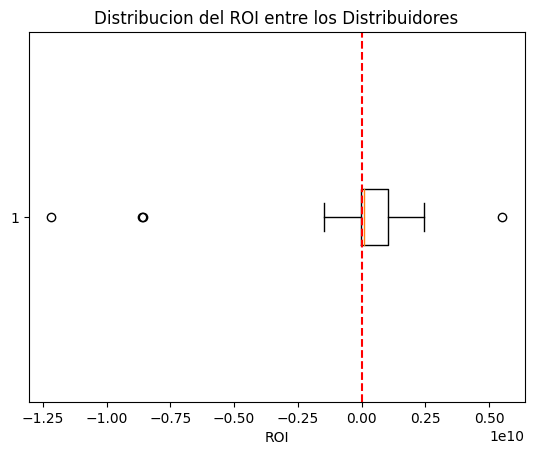

In [ ]:
plt.boxplot(df_ROI_distributor['Total'], vert=False)
plt.title('Distribucion del ROI entre los Distribuidores')
plt.xlabel('ROI')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

En el gráfico de cajas podemos observar un outlier muy negativo correspondiente al distribuidor con el menor ROI, Tromp-Abshire, con un ROI de $-12,178,431,091.

#### Distribuidores con ROI Negativo

Creamos una lista de distribuidores que poseen un ROI negativo

In [ ]:
distribuidores_ROI_negativos = df_ROI_distributor[df_ROI_distributor['Total'] < 0].sort_values('Total')
print(len(distribuidores_ROI_negativos))
display(distribuidores_ROI_negativos, len(distribuidores_ROI_negativos))

13


,distributor_id,distributor,distributor activities,years in the construction market,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Total
2,1183,Brekke-Stiedemann,construction materials import/distribution,13,15062958.80,-3.022398e+07,-15055547.16,1.646638e+07,4097840.44,-3.015426e+07,-5855969.91,50177298.32,4.917584e+07,-1.224233e+10,-27167520.67,37372585.66,-1.217843e+10
3,1526,Collins LLC,construction materials import/distribution,12,9636435.68,2.994701e+07,-15032150.67,1.528104e+07,17789776.14,-3.528029e+07,33616347.24,5063400.44,-8.686349e+09,-3.467604e+07,29373333.66,13651139.30,-8.616979e+09
28,1553,Mraz Group,"construction materials import/distribution, br...",15,5535918.61,-1.131631e+05,4100606.94,1.521923e+08,-9422994.80,-2.240874e+07,-22639916.88,15213739.14,-8.681476e+09,-2.647192e+07,24175793.25,-21795834.67,-8.583110e+09
20,1463,"Kreiger, Leffler and Dibbert",construction materials import/distribution,15,-8246004.08,-1.867834e+07,27311912.01,4.965491e+06,-34811196.84,-1.643044e+09,-2066640.32,15326928.09,2.044910e+08,-3.726673e+07,26560725.24,-1337461.77,-1.466795e+09
35,815,Schamberger and Sons,"construction materials import/distribution, co...",8,18726148.25,2.303202e+06,21227856.14,3.722666e+06,-4831218.51,-9.409755e+08,21604155.94,-29050714.16,2.930228e+07,-3.899481e+07,-19839618.16,-4488407.39,-9.412940e+08
41,1560,Volkman-Goyette,"construction materials import/distribution, in...",18,19697809.41,1.549984e+08,20135565.61,8.772050e+06,-30581809.87,-9.258356e+08,36299987.01,-36589428.66,-1.385384e+07,-2.111499e+07,-7006512.16,17918119.61,-7.771603e+08
22,1104,Langworth Group,"construction materials import/distribution, ne...",22,-8948350.80,-7.136405e+06,-1916861.50,-1.562235e+07,-31308119.92,-1.596246e+08,22395378.30,-7105151.39,5.215420e+06,-2.340331e+07,-14160325.84,-29756919.59,-2.713716e+08
27,1666,"Marks, Walker and Streich","construction materials import/distribution, ce...",25,7691541.86,3.790120e+07,27731713.31,-1.100115e+07,-2742265.39,-4.295050e+07,11451347.86,-14422304.14,-1.966553e+08,-3.059714e+07,14506235.80,-20147421.87,-2.192340e+08
17,860,Kling Group,"construction materials import/distribution, in...",20,-7306593.50,2.738202e+07,-35044779.66,-3.120670e+06,-24434235.77,-2.449509e+07,-15928075.42,-15119098.93,-3.179444e+07,-4.392647e+07,42511752.86,-24418120.92,-1.556938e+08
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22,-12764117.42,5.104473e+07,3172900.49,1.204519e+07,28983950.25,-3.974593e+07,-10101050.08,45319338.01,-3.340945e+07,-3.350758e+07,-3692039.50,-43781631.42,-3.643568e+07


13

#### Gráfico de Barras Horizontales de Distribuidores con ROI Negativo

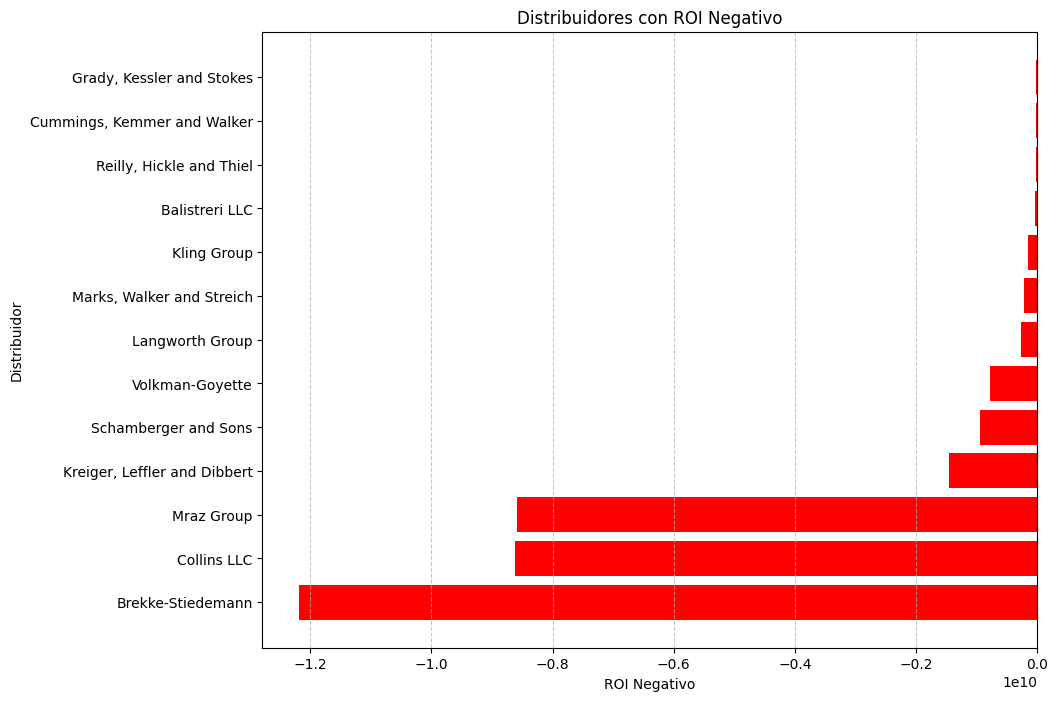

In [ ]:
plt.figure(figsize=(10, 8))
plt.barh(distribuidores_ROI_negativos['distributor'], distribuidores_ROI_negativos['Total'], color='red')
plt.xlabel('ROI Negativo')
plt.ylabel('Distribuidor')
plt.title('Distribuidores con ROI Negativo')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### ROI Medio por Actividad del Distribuidor

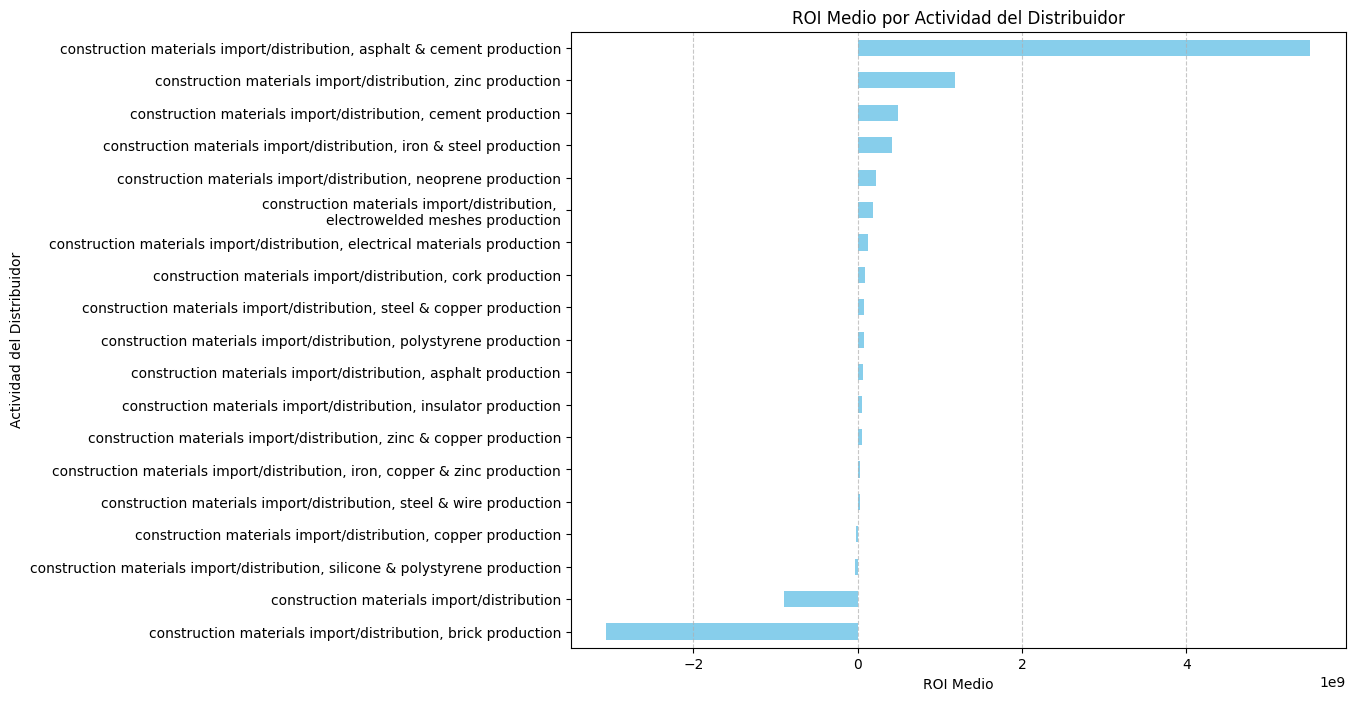

In [ ]:
mean_roi_per_activity = df_ROI_distributor.groupby('distributor activities')['Total'].mean().sort_values()

plt.figure(figsize=(10, 8))
mean_roi_per_activity.plot(kind='barh', color='skyblue')
plt.xlabel('ROI Medio')
plt.ylabel('Actividad del Distribuidor')
plt.title('ROI Medio por Actividad del Distribuidor')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Distribución del ROI por Actividad del Distribuidor

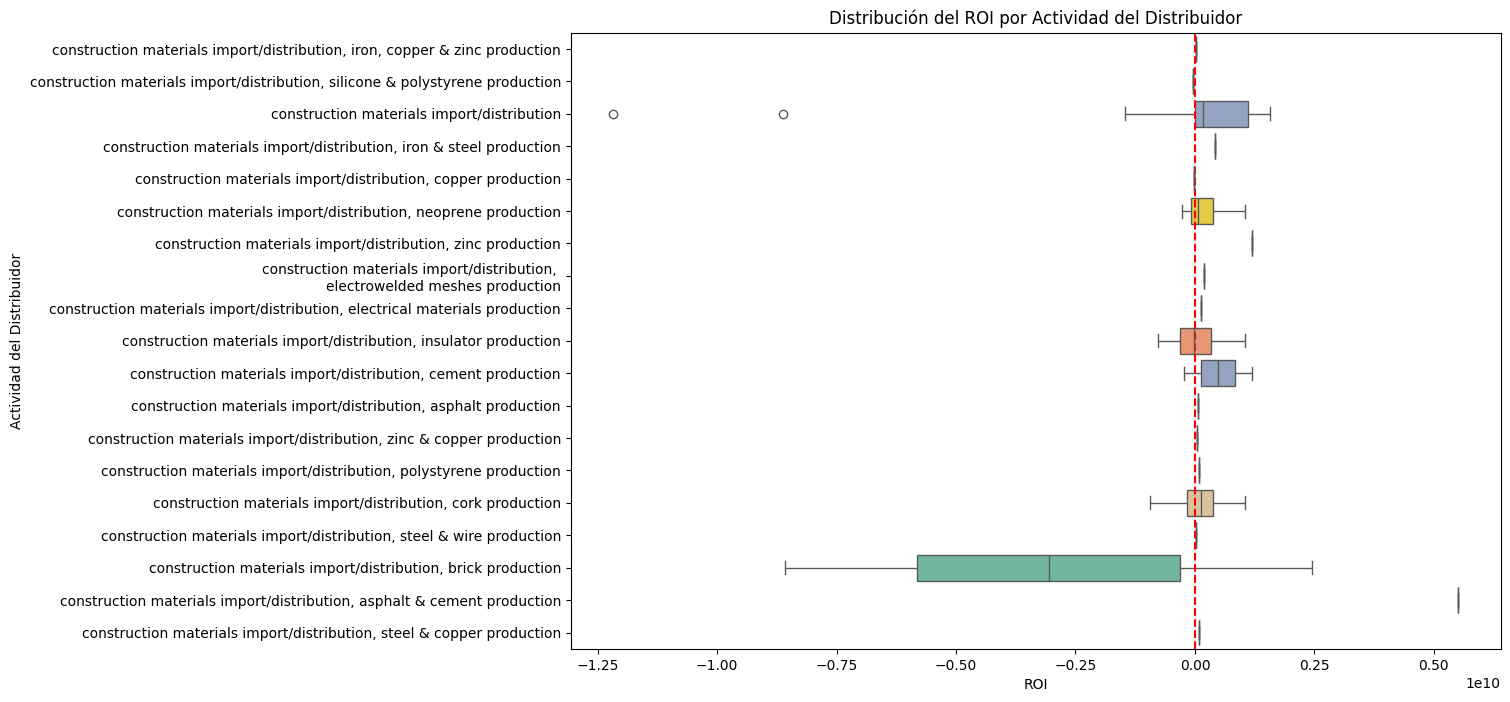

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_ROI_distributor, x='Total', y='distributor activities', palette='Set2')
plt.xlabel('ROI')
plt.ylabel('Actividad del Distribuidor')
plt.title('Distribución del ROI por Actividad del Distribuidor')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

#### Análisis de Ventas Nulas de Materiales

In [ ]:
filtered_df = df_sales[(df_sales['Brick'] == 0.0) & (df_sales['Steel'] == 0.0)]
filtered_df_brick = df_sales[df_sales['Brick'] == 0.0]
filtered_df_steel = df_sales[df_sales['Steel'] == 0.0]

count_steel_zero = filtered_df_steel.shape[0]
count_brick_zero = filtered_df_brick.shape[0]

total_distributors = df_ROI_distributor['distributor_id'].nunique()

percent_steel_zero = (count_steel_zero / total_distributors) * 100
percent_brick_zero = (count_brick_zero / total_distributors) * 100

print(f"Cantidad de ventas de Steel = 0: {count_steel_zero}")
print(f"Cantidad de ventas de Brick = 0: {count_brick_zero}")
print(f"Cantidad total de distribuidores: {total_distributors}")
print(f"Porcentaje de ventas donde Steel = 0 respecto al total de distribuidores: {percent_steel_zero:.2f}%")
print(f"Porcentaje de ventas donde Brick = 0 respecto al total de distribuidores: {percent_brick_zero:.2f}%")

Cantidad de ventas de Steel = 0: 12
Cantidad de ventas de Brick = 0: 36
Cantidad total de distribuidores: 44
Porcentaje de ventas donde Steel = 0 respecto al total de distribuidores: 27.27%
Porcentaje de ventas donde Brick = 0 respecto al total de distribuidores: 81.82%


#### Visualizamos el ROI total para cada material

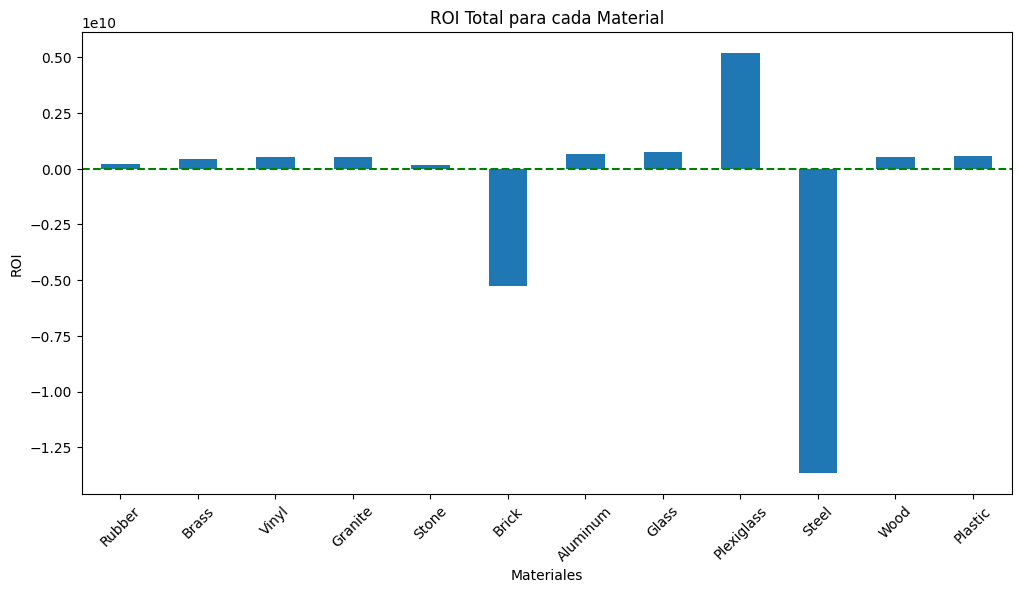

In [ ]:
columns_to_plot = df_ROI_distributor.columns[4:-1]
sums = df_ROI_distributor[columns_to_plot].sum()

plt.figure(figsize=(12, 6))
sums.plot(kind='bar')

plt.xlabel('Materiales')
plt.ylabel('ROI')
plt.title('ROI Total para cada Material')
plt.axhline(0, color='g', linestyle='--')
plt.xticks(rotation=45)

plt.show()

#### Gráfico de ROI Individual por Material para Distribuidores con ROI Negativo

Visualizamos el ROI individual por material de cada uno de los distribuidores que poseen un ROI total negativo

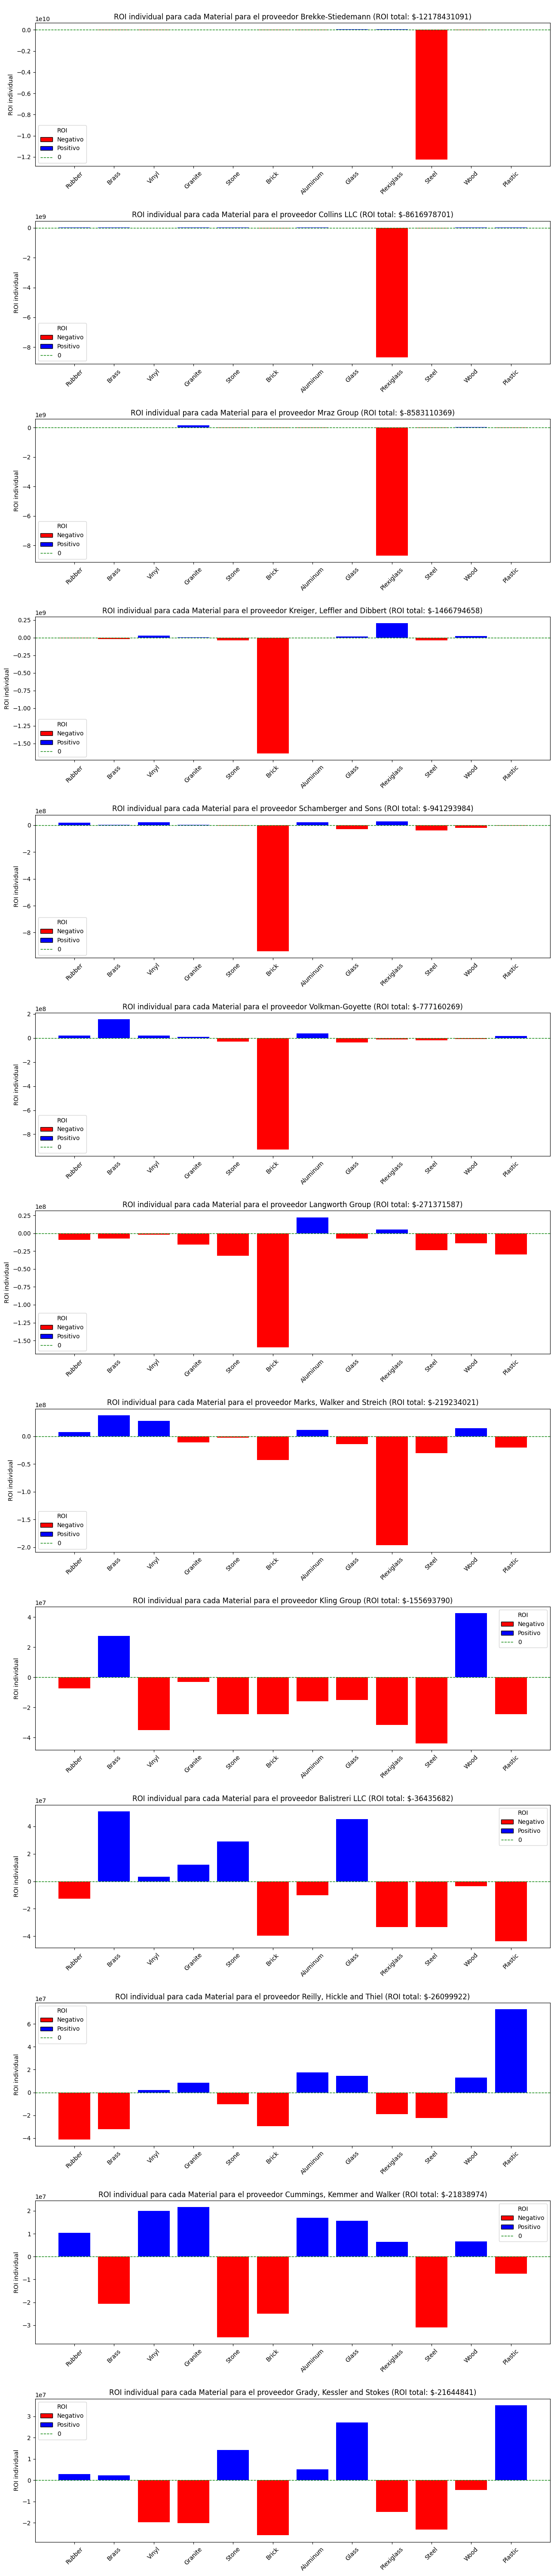

In [ ]:
num_grafico = 0
posiciones = distribuidores_ROI_negativos.index.tolist()

fig, axes = plt.subplots(nrows=len(posiciones), ncols=1, figsize=(13,60))
axes:list[plt.Axes]

for posicion in posiciones:
    columns_to_plot = df_ROI_distributor.columns[4:-1]
    distribuidor:pd.DataFrame = df_ROI_distributor[columns_to_plot].loc[posicion]

    colores = ['red' if valor < 0 else 'blue' for valor in distribuidor.values]

    axes[num_grafico].bar(distribuidor.index, distribuidor.values, color=colores)
    axes[num_grafico].set_ylabel('ROI individual')
    axes[num_grafico].set_title(f'\nROI individual para cada Material para el proveedor {df_ROI_distributor["distributor"].loc[posicion]} (ROI total: ${int(df_ROI_distributor["Total"].loc[posicion])})')
    axes[num_grafico].tick_params(axis='x', rotation=45)
    axes[num_grafico].axhline(0, color='g', linestyle='--', linewidth=1)

    axes[num_grafico].legend(labels=['Negativo', 'Positivo', '0'], title='ROI',
                             handles=[
                                 plt.Rectangle((0, 0), 1, 1, color='red', ec="k"),
                                 plt.Rectangle((0, 0), 1, 1, color='blue', ec="k"),
                                 plt.Line2D([0], [0], color='g', linestyle='--', linewidth=1)
                             ])
    num_grafico += 1

plt.tight_layout()
plt.show()

Creamos un grafico mas detallado para los distribuidores de ROI negativo en sus materiales que poseen ROI negativo para ver la diferencia entre venta y exportacion

#### Gráfico Detallado de Ventas vs Exportaciones para Distribuidores con ROI Negativo

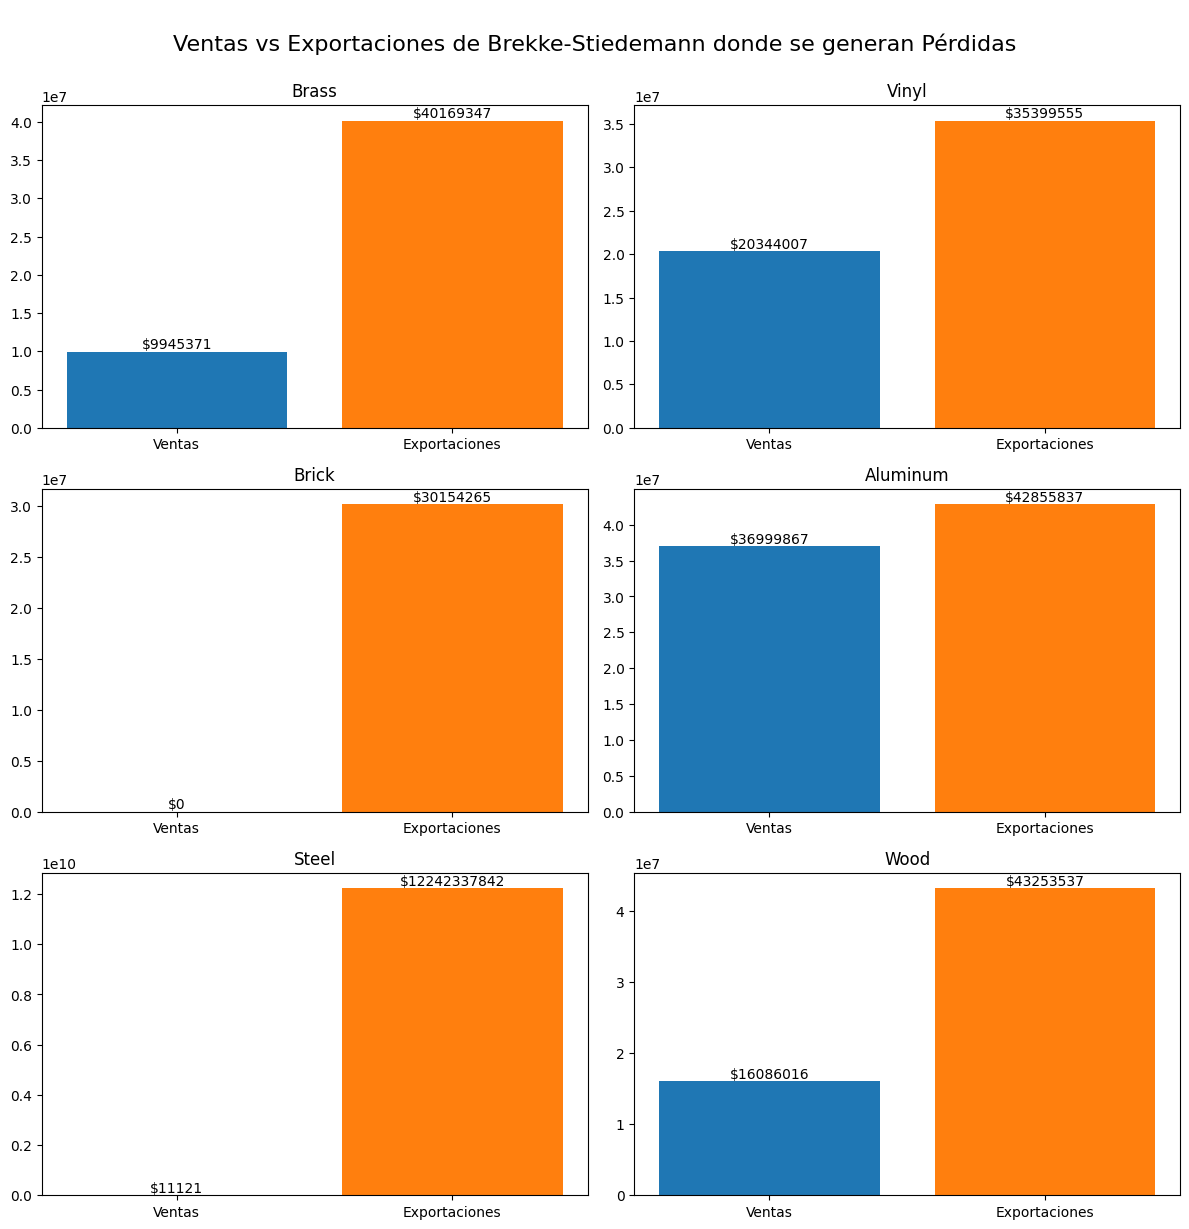

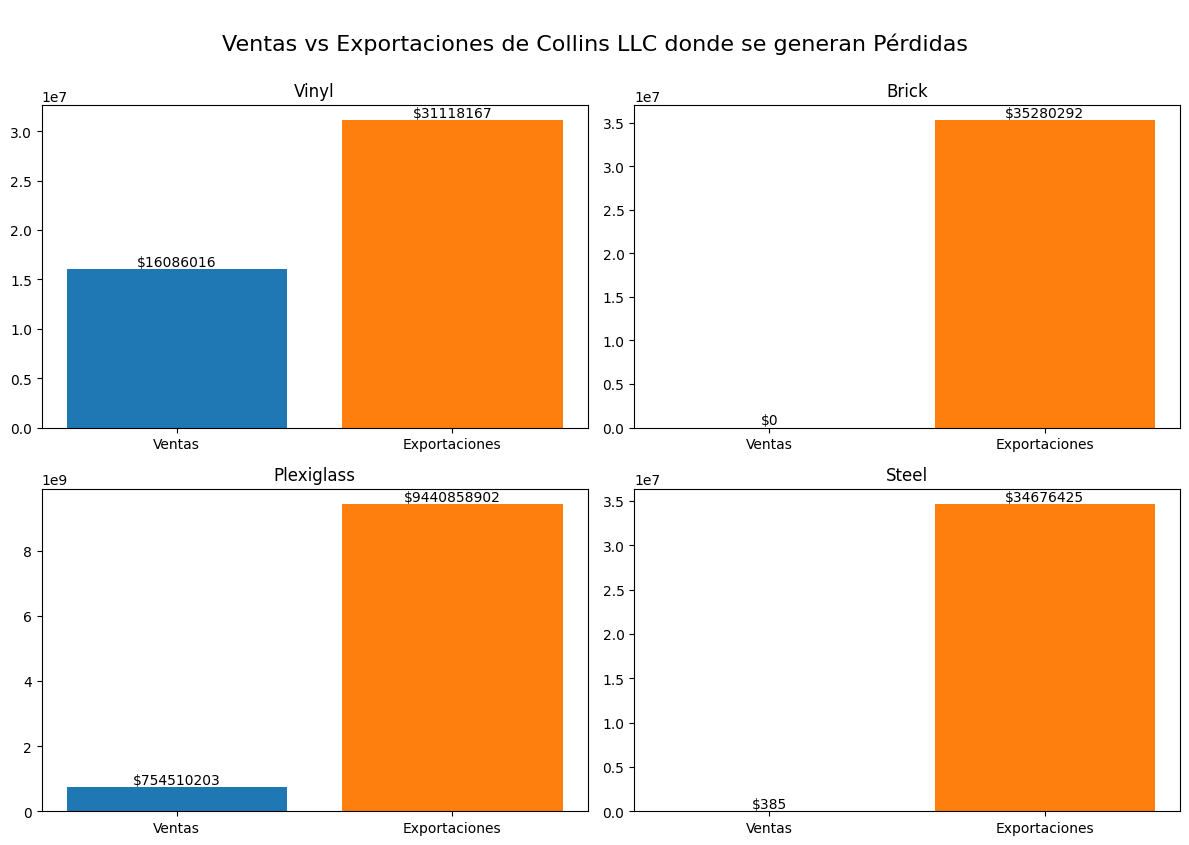

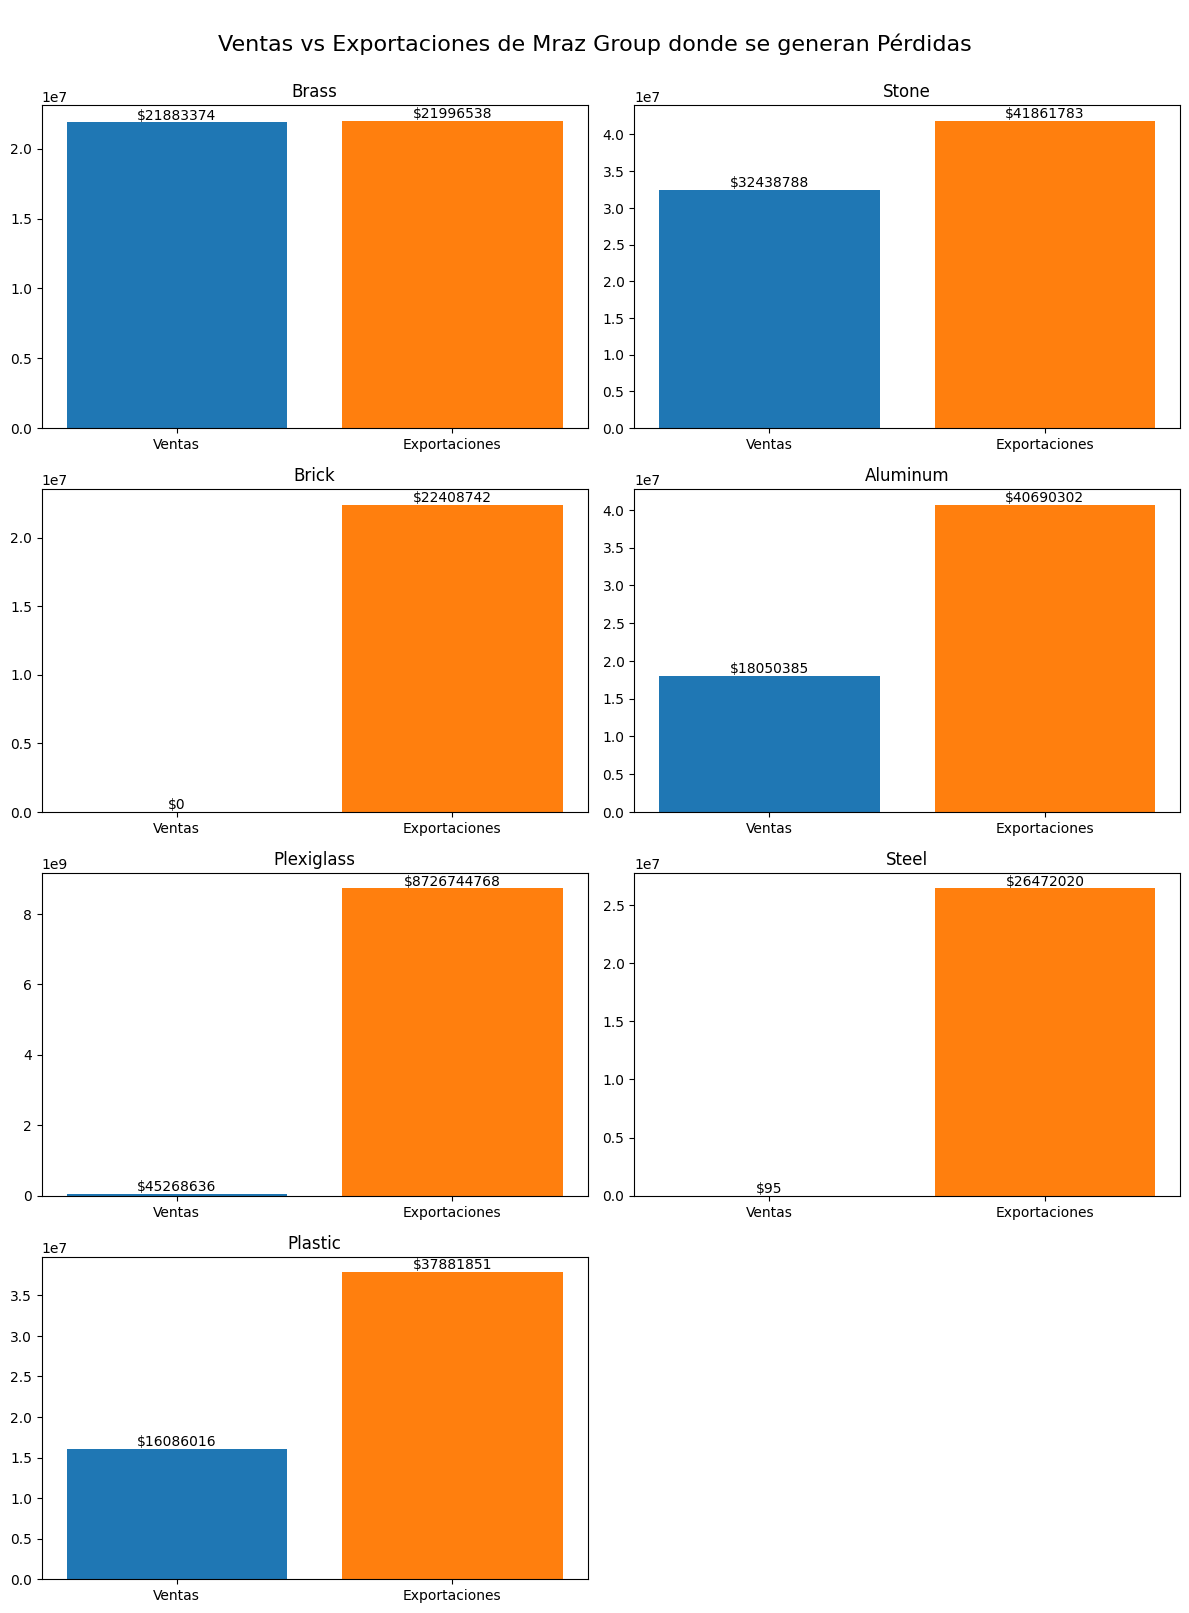

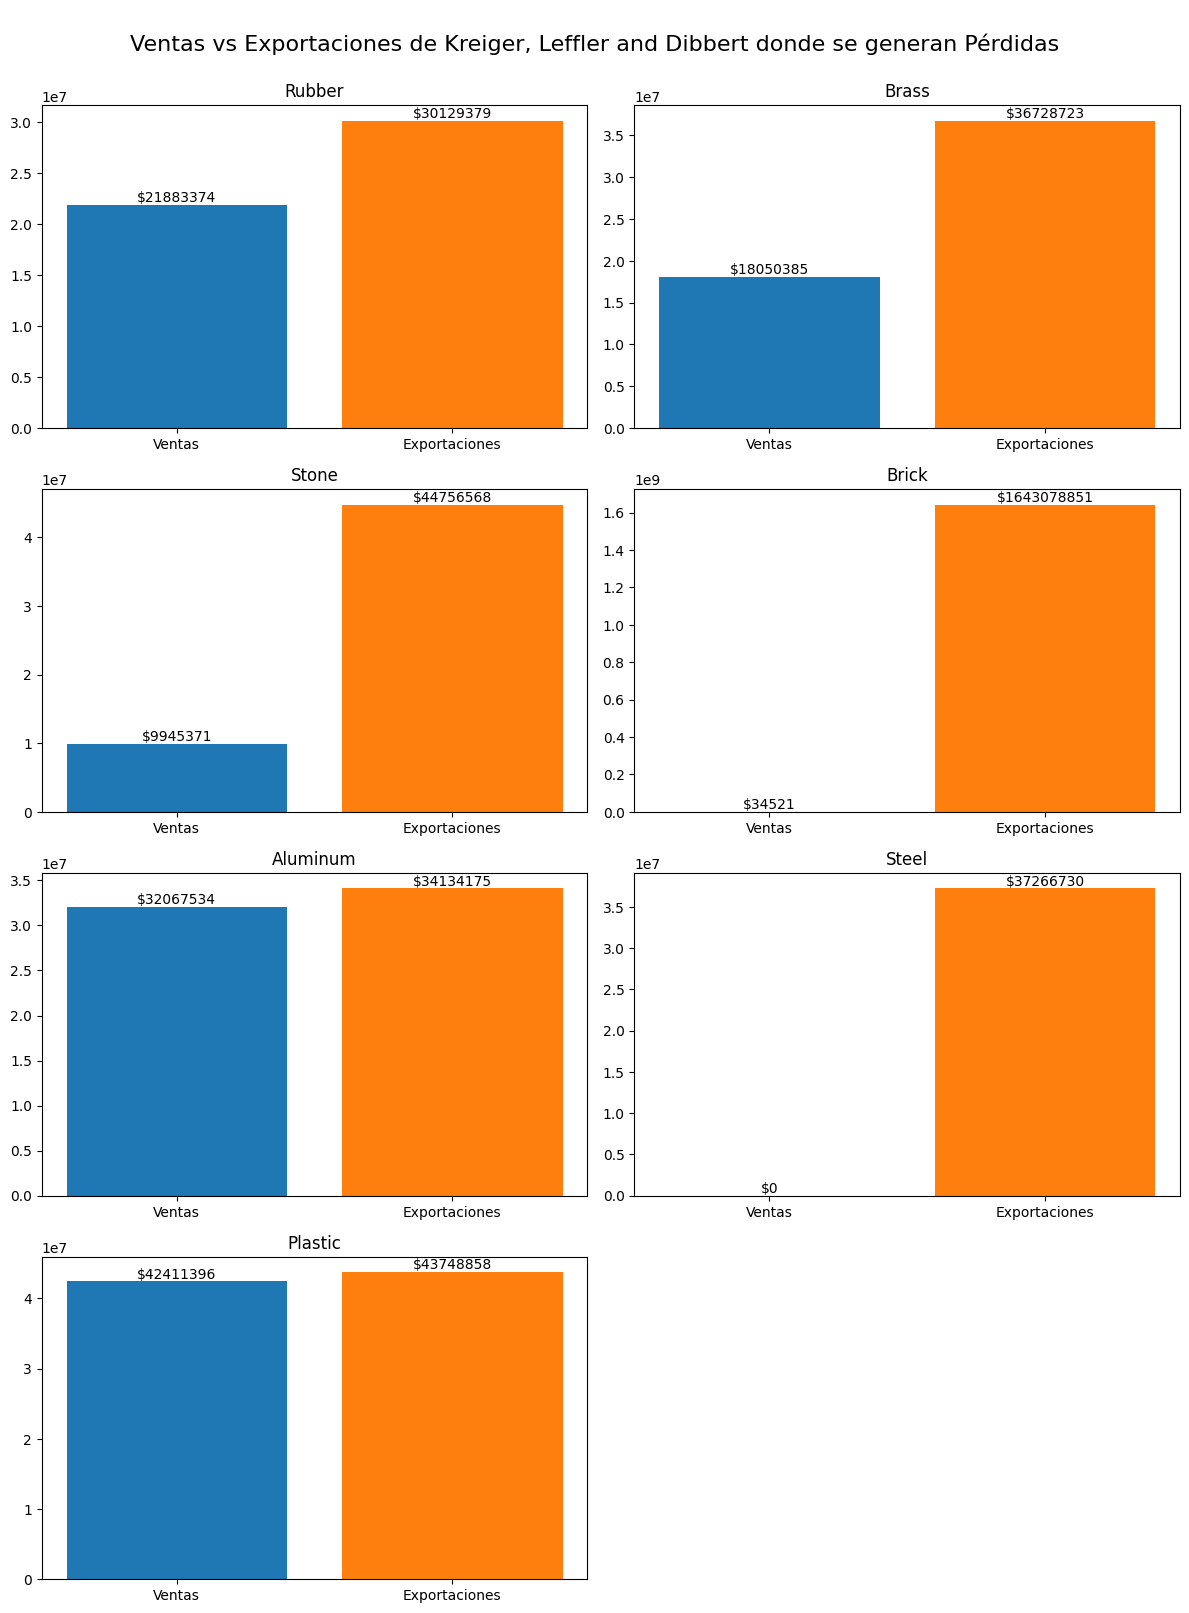

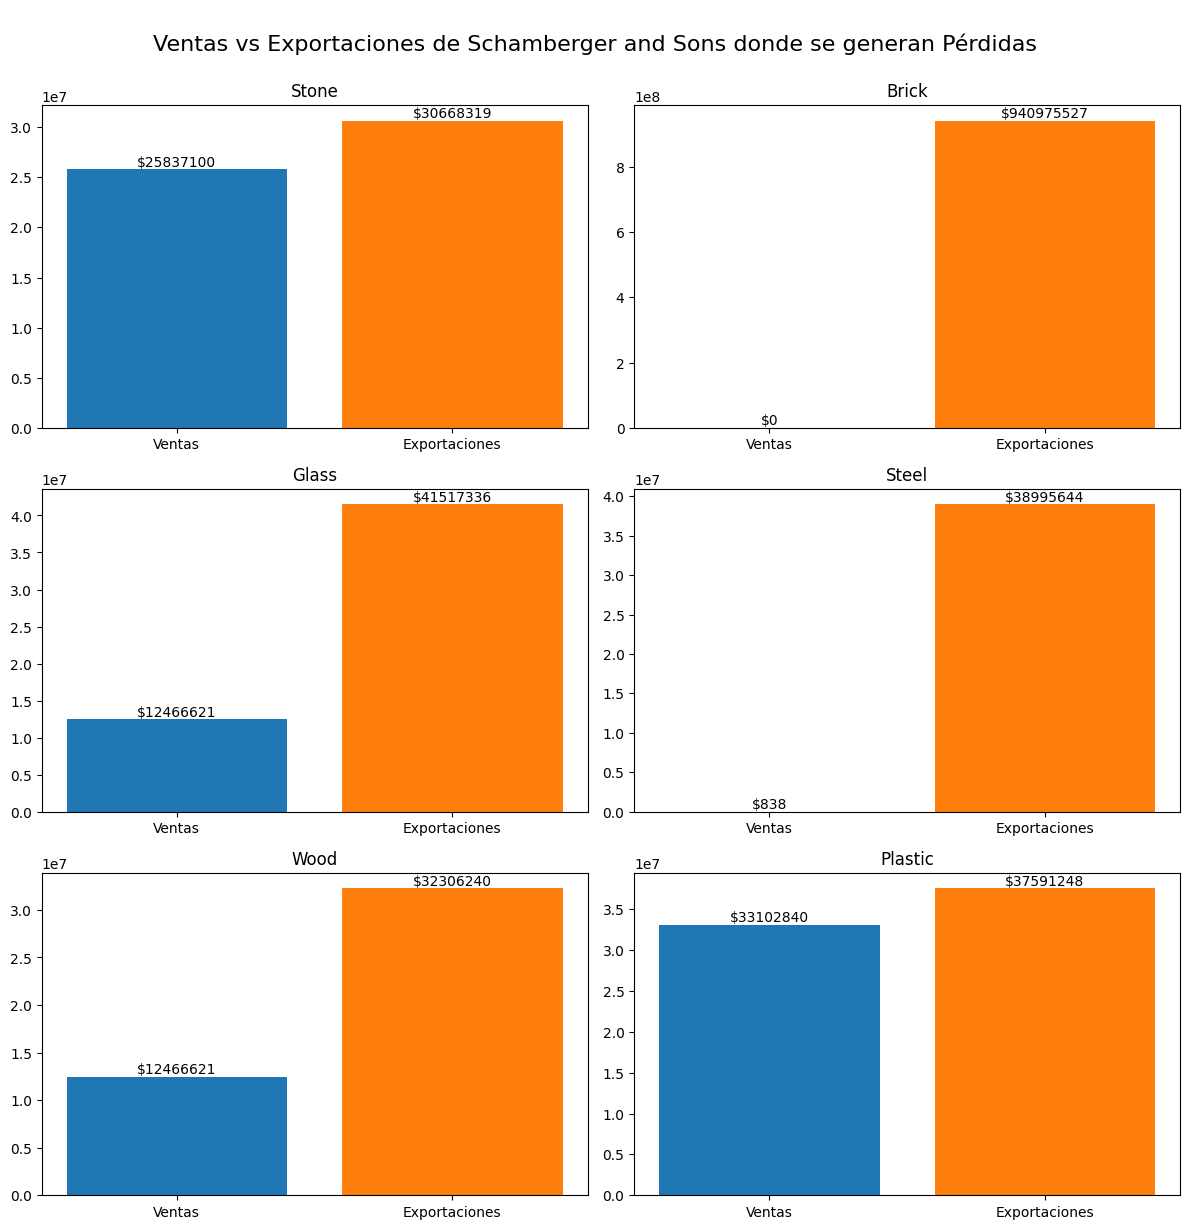

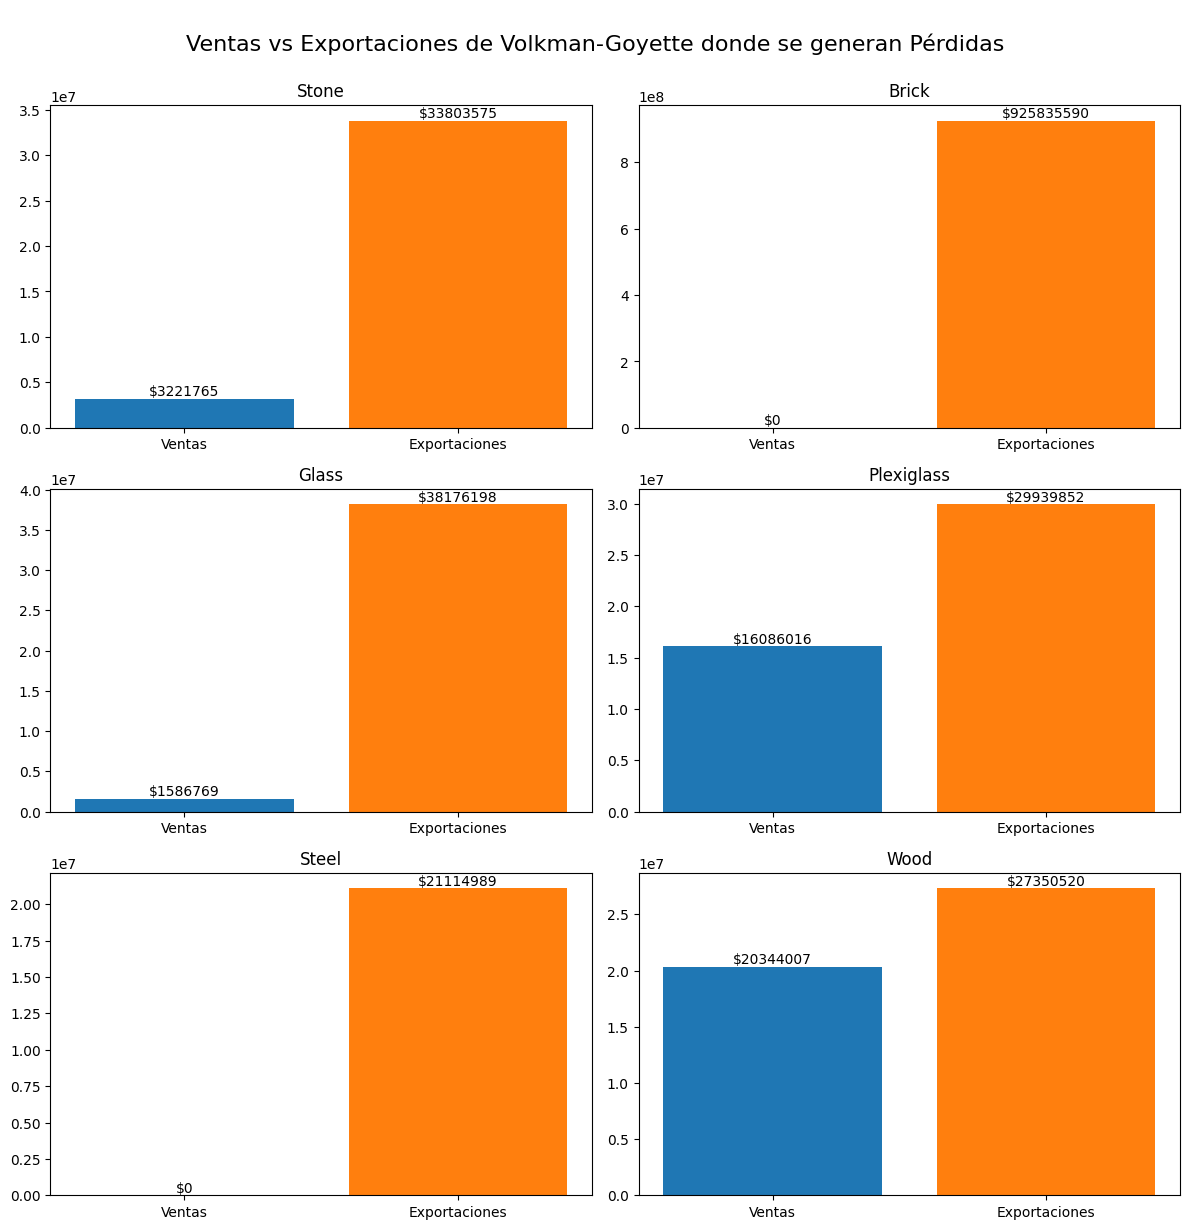

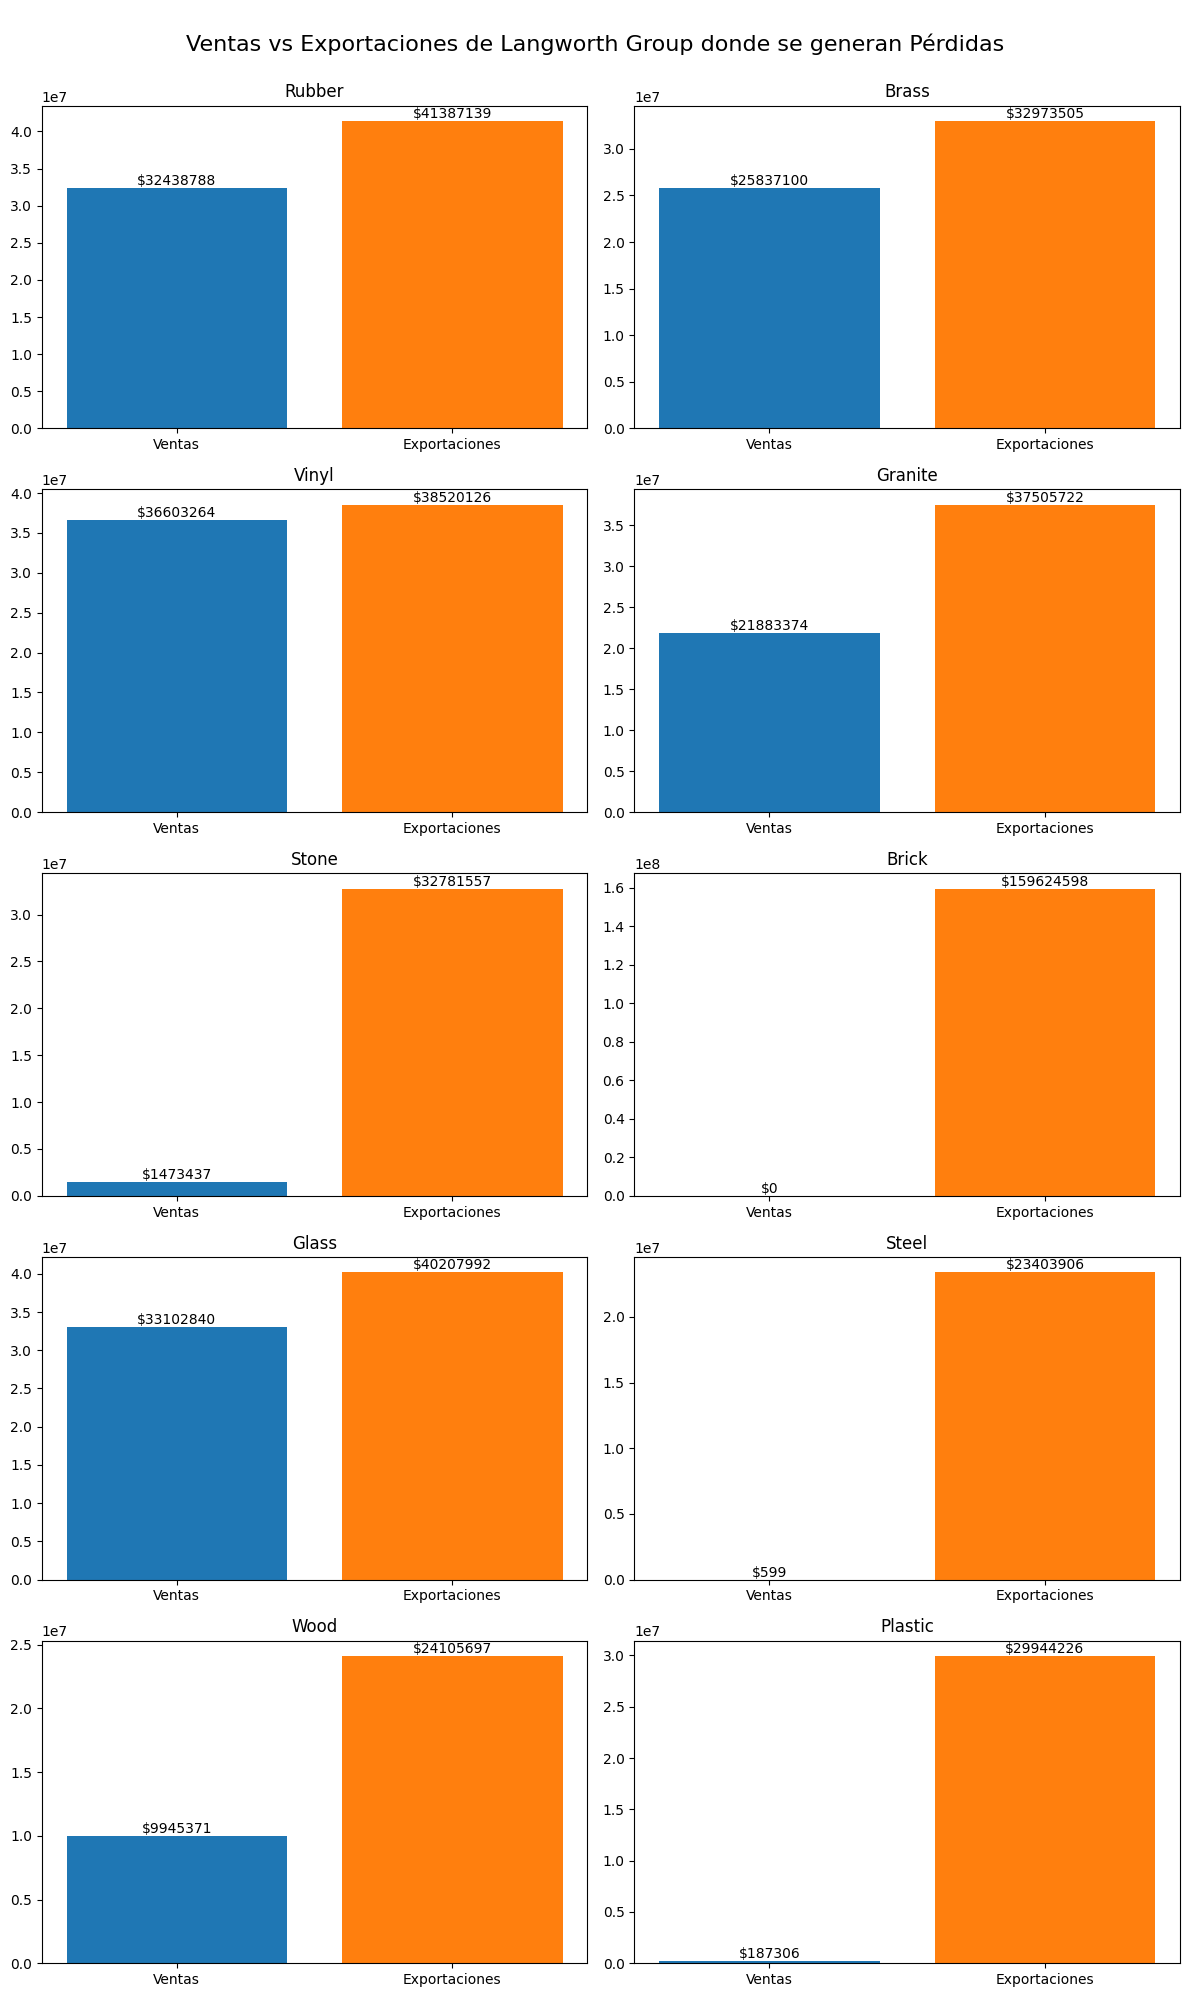

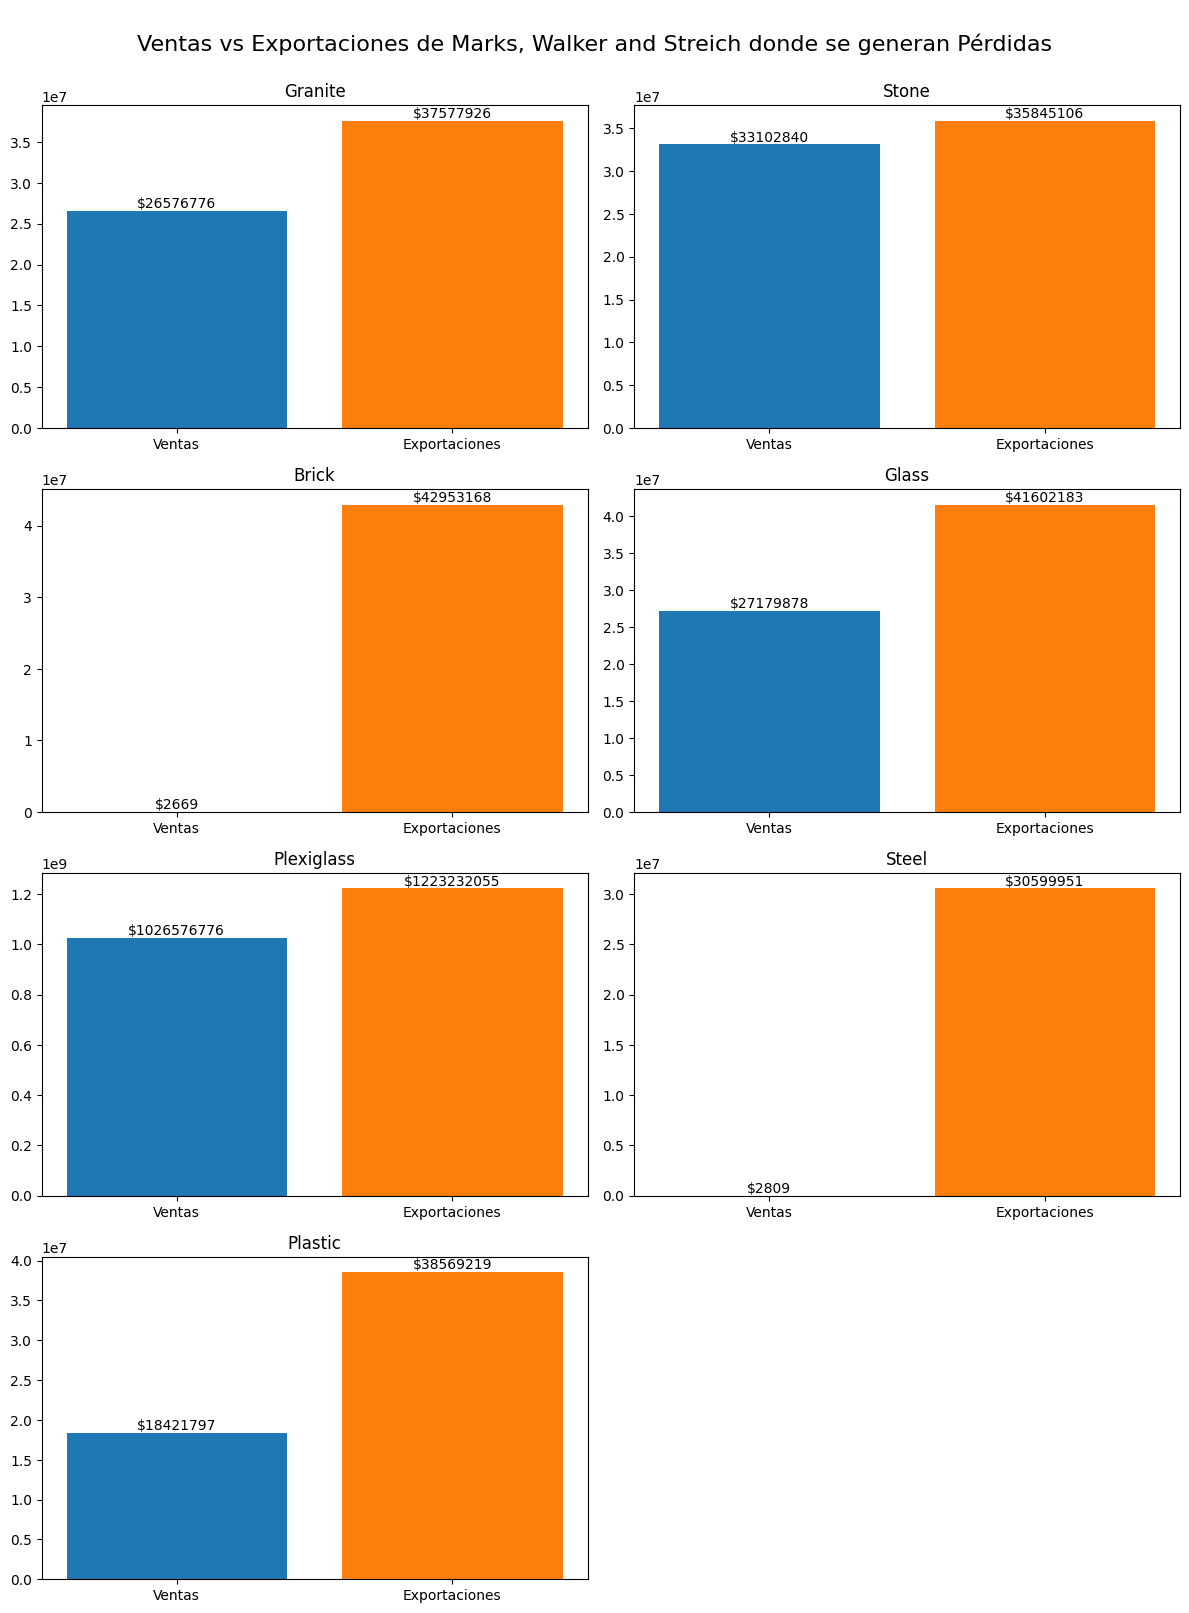

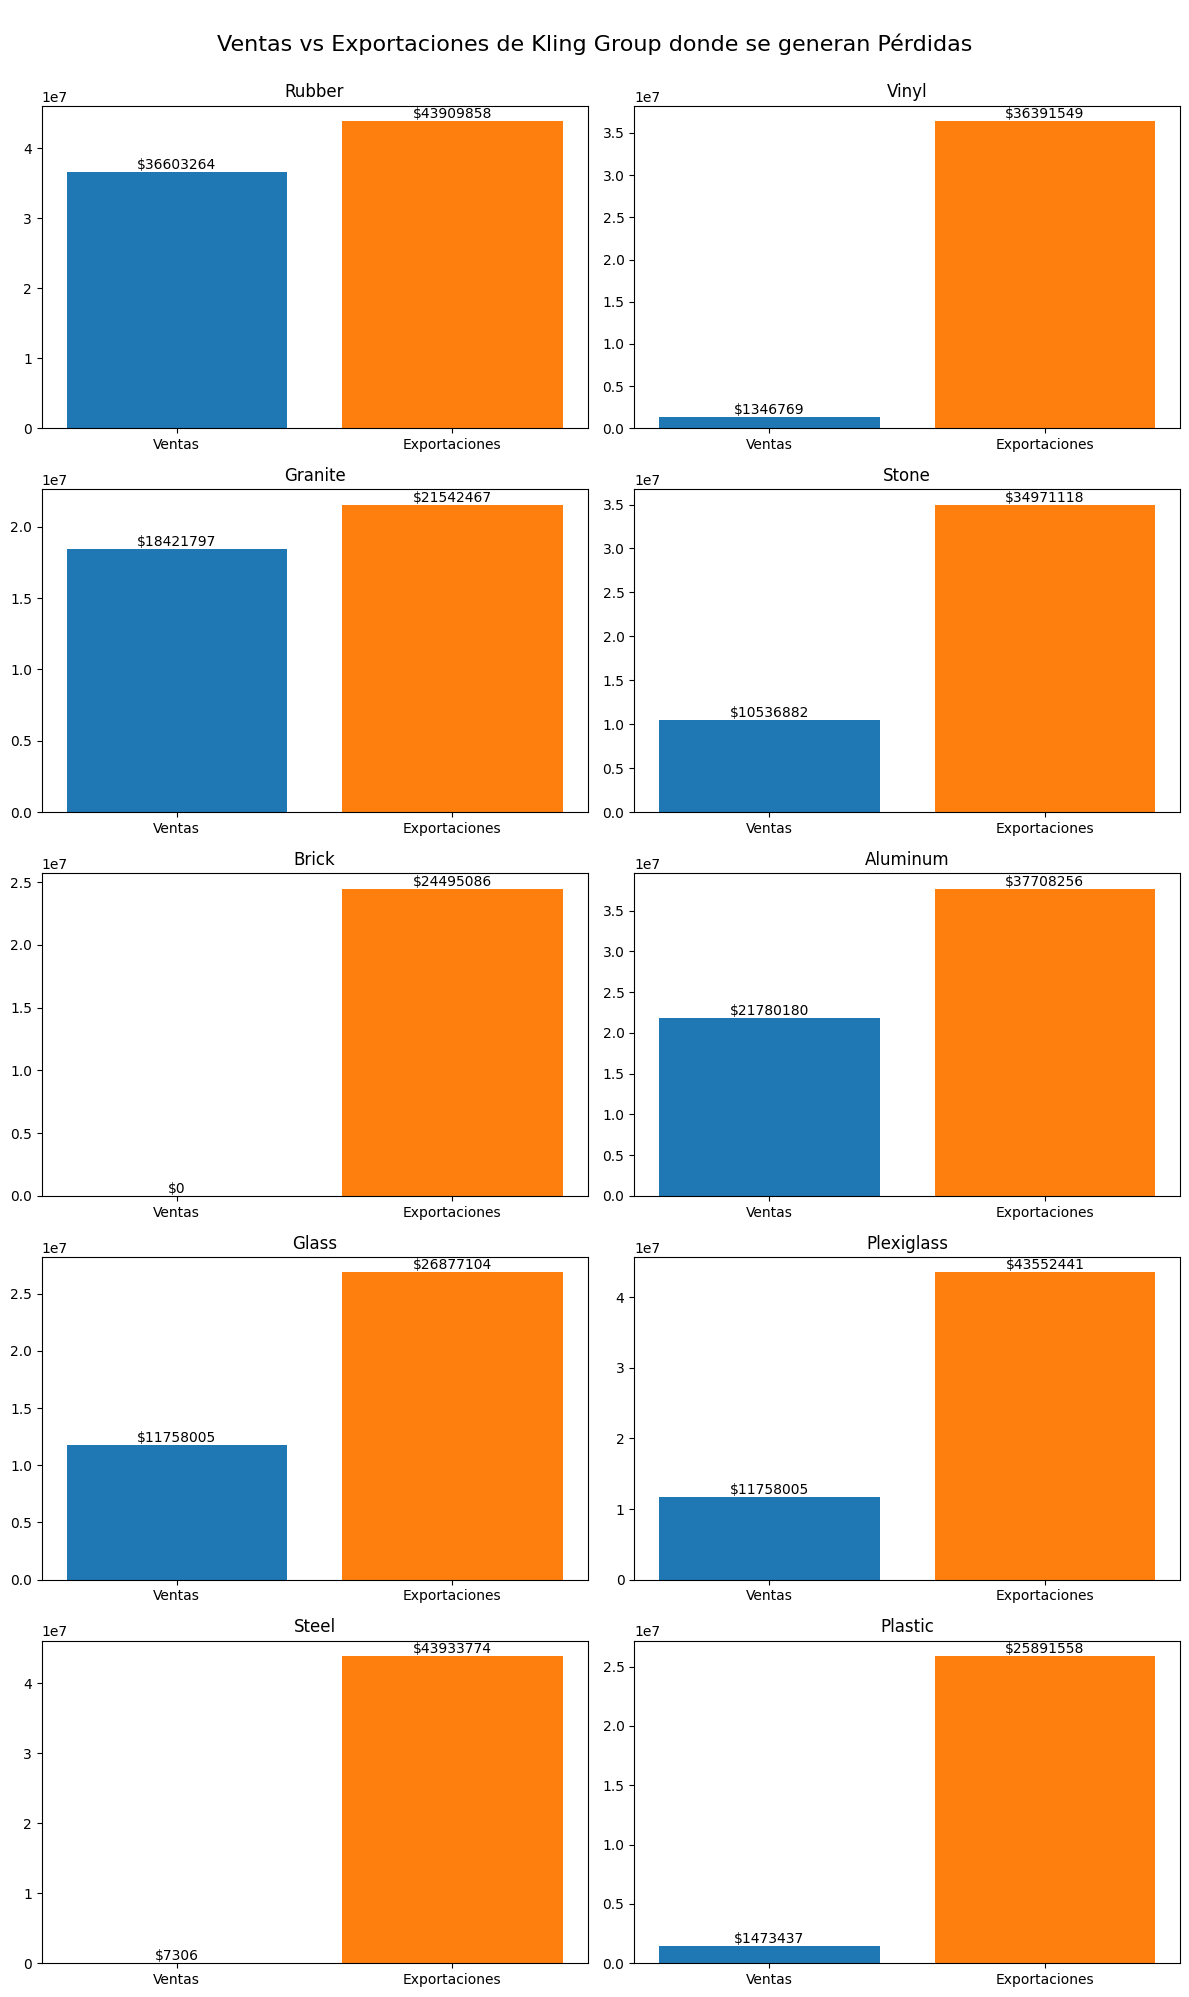

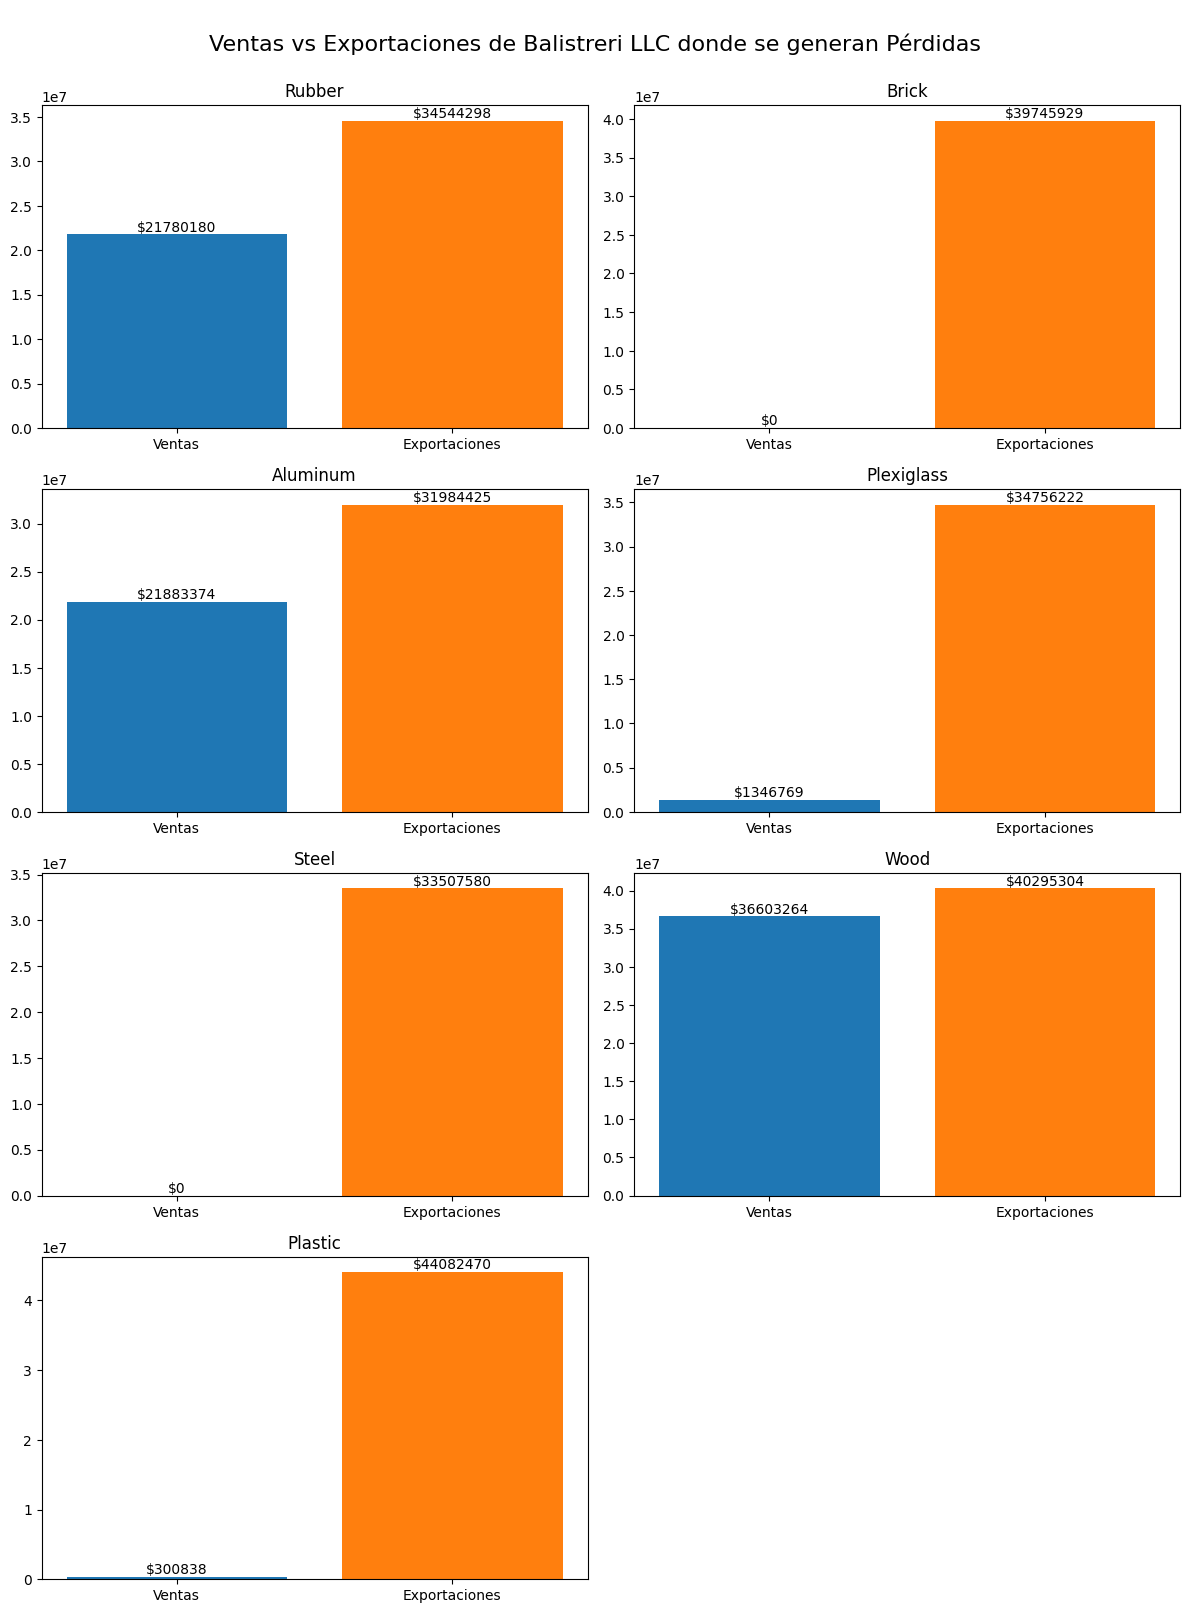

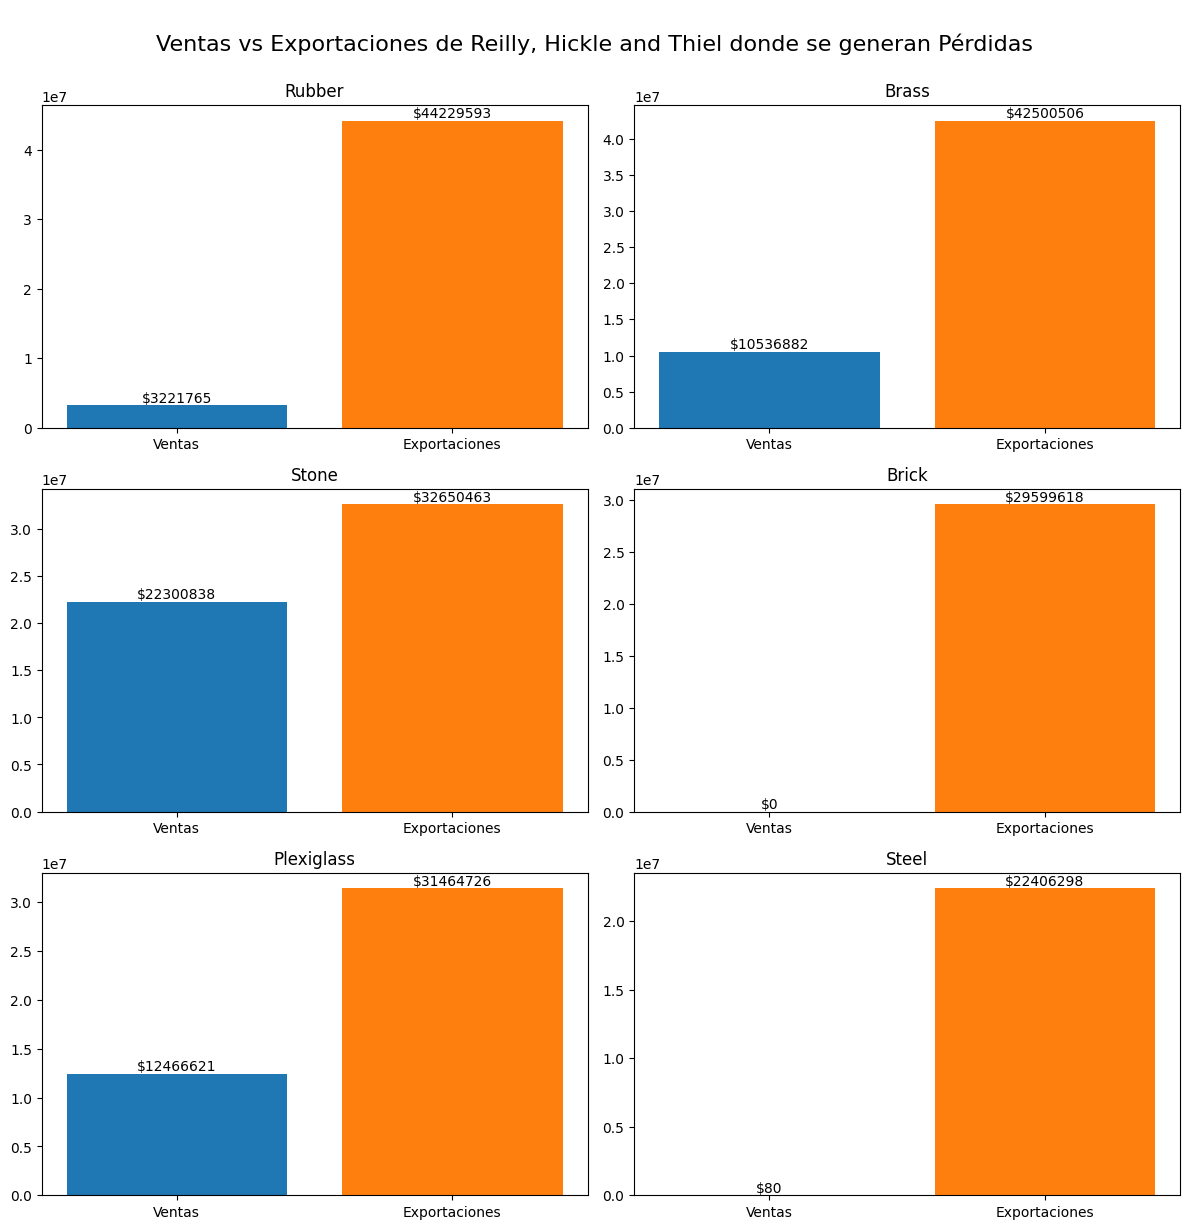

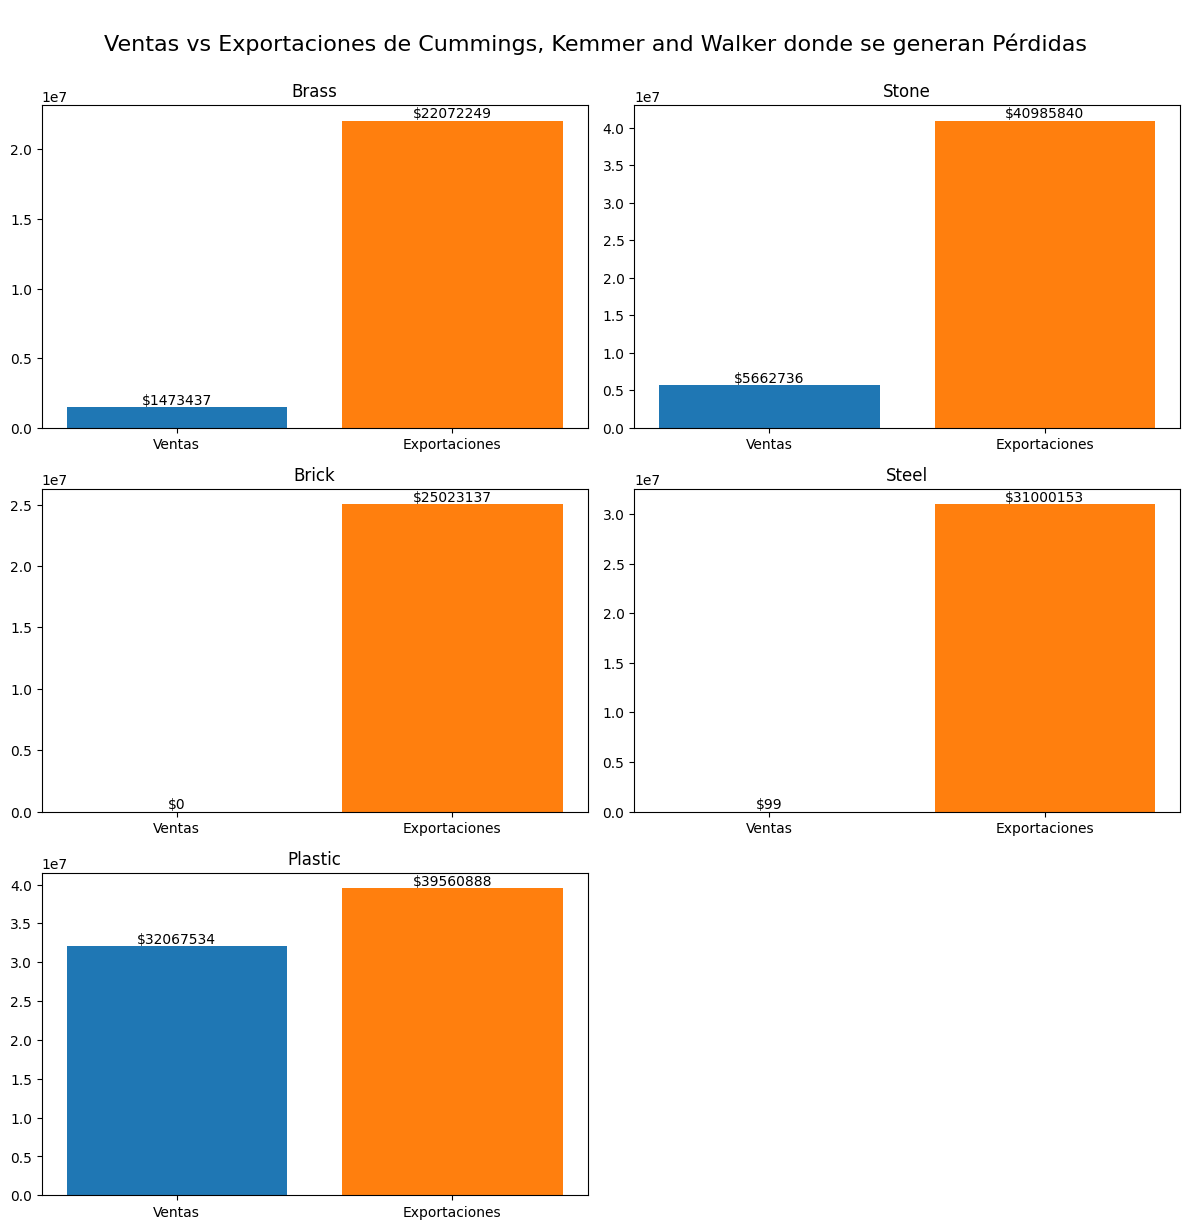

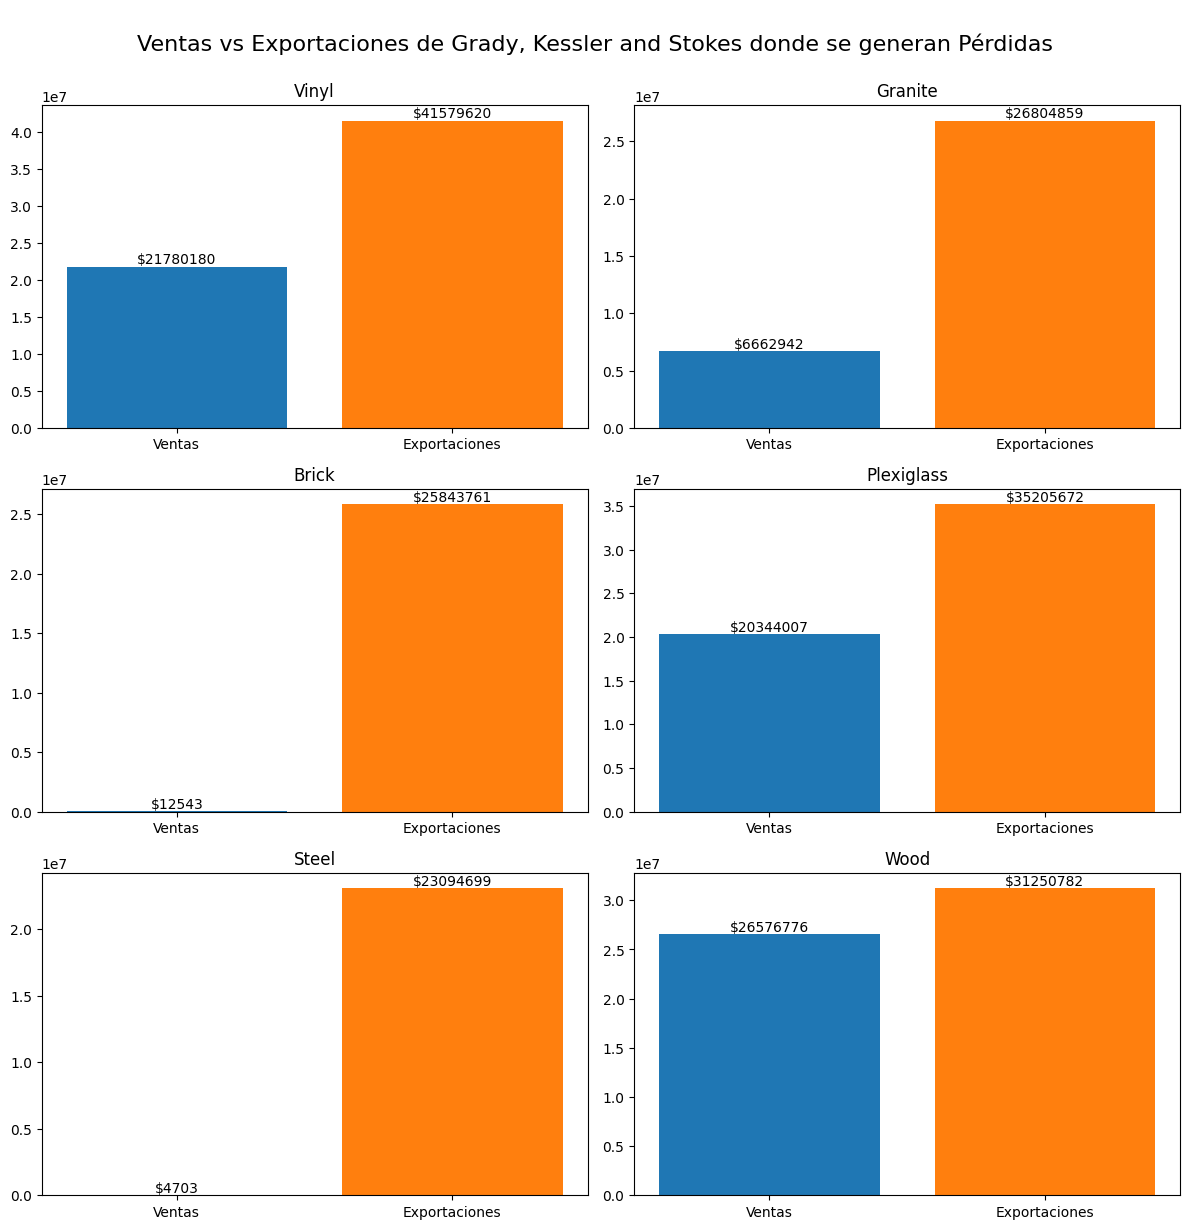

In [ ]:
materiales = distribuidores_ROI_negativos.columns[4:-1]
distribuidores_id = distribuidores_ROI_negativos['distributor_id']
distribuidores = distribuidores_ROI_negativos['distributor']

for distribuidor_id, distribuidor in zip(distribuidores_id, distribuidores):
    fig, axes = plt.subplots(6, 2, figsize=(12, 24))
    axes = axes.flatten()
    fig.suptitle(f'\nVentas vs Exportaciones de {distribuidor} donde se generan Pérdidas\n\n', fontsize=16)

    pos = 0  # Contador de subplots válidos
    for material in materiales:
        roi_value = distribuidores_ROI_negativos.loc[distribuidores_ROI_negativos['distributor_id'] == distribuidor_id, material].values

        if roi_value.size > 0 and roi_value[0] < 0:
            ventas_val = df_sales.loc[df_sales['distributor_id'] == distribuidor_id, material].values
            exportaciones_val = df_exports.loc[df_exports['distributor_id'] == distribuidor_id, material].values

            if ventas_val.size > 0 and exportaciones_val.size > 0:
                ventas_val = ventas_val[0]
                exportaciones_val = exportaciones_val[0]

                ventas_bar = axes[pos].bar('Ventas', ventas_val)
                exportaciones_bar = axes[pos].bar('Exportaciones', exportaciones_val)

                axes[pos].bar_label(ventas_bar, labels=[f'${int(ventas_val)}'])
                axes[pos].bar_label(exportaciones_bar, labels=[f'${int(exportaciones_val)}'])

                axes[pos].set_title(material)
                pos += 1

    # Eliminar subplots vacíos
    for j in range(pos, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## CONCLUSION



> ### **CONCLUSION**
> **El problema:** Observamos que el principal factor detrás del bajo ROI es la pérdida o ROI negativo causado por ciertos materiales. Esta disparidad entre las exportaciones y las ventas significa que los materiales exportados pero no vendidos resultan en pérdidas o ROIs negativos.
>
>**El motivo:** Hemos identificado materiales que causan pérdidas significativas tanto en distribuidores con ROI total positivo como negativo. Por lo tanto, es crucial analizar qué materiales específicos están provocando estas pérdidas sustanciales o ROIs negativos para cada distribuidor. Se recomienda considerar dejar de exportar estos materiales a distribuidores donde generen ROIs negativos, ya que parece que no tienen demanda en el mercado o ciudad donde operan.




